# Supervised Learning - Foundations Project: ReCell 

Submitted by: Neha Biswas

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Importing libraries for reading the data manipulation:
import numpy as np
import pandas as pd

# Importing libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data:
df = pd.read_csv('/content/drive/MyDrive/Univ_Texas/Supervised_Learning_Foundation/Project/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Displaying first 5 rows of the dataset: 
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

Observation:

*   The datafame has 15 columns. Each row in the data dataset represents a used cell phone/tablet along with details associated with its make, model specifications, original price, and re-sell price values.



In [ ]:
#Checking shape of the dataset: 
df.shape
print(f'No. of rows in the dataset: {df.shape[0]}')
print(f'No. of columns in the dataset: {df.shape[1]}')

No. of rows in the dataset: 3454
No. of columns in the dataset: 15


Observation: 

*   There are 3454 rows and 15 columns in the dataset.


In [ ]:
# Info table: Checking the datatypes of the columns for the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observation: 

*   The columns have int, float, and object datatypes.
*   4 columns that are of object datatype are brand_name, os, 4g, and 5g.
*   2 columns that are of int datatype are release_year and days_used.
*   9 columns that are of float datatype are screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, normalized_used_price, and normalized_new_price.


In [ ]:
#Statistical summary of the dataset
df.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

In [ ]:
#Statistical summary of the dataset for 'object' columns:
df.describe(include='object')

brand_name       os    4g    5g
count        3454     3454  3454  3454
unique         34        4     2     2
top        Others  Android   yes    no
freq          502     3214  2335  3302

Observations: 

*   The normalized prices for used devices range from around 1.54 euros to 6.62 euros with similar average and median prices (median = 4.41 euros).
*   The normalized prices for new devices of the same model are comparatively more than their used counterparts. The normalized new prices range from 2.9 euros to 7.85 euros with similar average and median prices (median = 5.25 euros).
*   The smallest screen size of a device in the dataset is 5.08 cm and the largest is 30.71 cm with a median of 12.83 cm.
*   The highest rear camera resolution of a device is 48MP while the lowest is 0.08MP with a median of 8MP.
*   The highest front camera resolution of a device is 32MP while the lowest is 0MP with a median of 5MP.
*   The amount of internal memory present in the devices ranges from 0.01GB to 1024GB with a median of 32GB. The average value of internal memory is around 54.57GB which is more than its median value, indicating the presence of a right skew in the distribution.
*   The amount of time a device has been used ranges from around 3 months to 3 years. The average of this column is less than its median value indicating the presence of a left-skew in the data.
*   The minimum amount of ram present in the devices is 0.02GB while the maximum is 12GB. The 25th, 50th, and 75th percentile values for the amount of ram present in various devices are the same, ie, 4GB.
*   The minimum and maximum battery capacities are 500mAh and 9720mAh respectively. The average value of battery capacity is 3133.4mAh, which is slightly more than its median value.
*   The weight of the used devices ranges from 69 to 855 grams. 
*   The data contains models released from 2013 to 2020 across  various brands.
*   Android is the most commonly occurring operating system in the dataset, while the most commonly occurring brand name is labeled as 'Others'.
*   Majority of the devices seem to support 4g.













In [ ]:
# Checking for fuplicate rows: 
df.duplicated().sum()

0

In [ ]:
# Checking for missing values: 
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations: 

*   There are no duplicate records in the dataset.
*   Following are the number of missing values per column:

|  Column Name.      | No.of missing values |
| ------------------ | -------------------- |
| main_camera_mp     |                 179  |
| selfie_camera_mp   |                   2  |
| int_memory         |                   4  |
| ram                |                   4  |
| battery            |                   6  |
| weight             |                   7  |


## Exploratory Data Analysis (EDA) 

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
# function to create histogram and box plots
def creating_hist_box(df, feature, kde= True, bins=None, figsize =(10, 4)):
      f2, (ax_hist, ax_box) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
      f2.tight_layout(pad=5.0)

      if bins: 
        sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist, bins=bins) 
        ax_hist.set_title(f'Histogram with bins = {bins}')
      else:
        sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist)
        ax_hist.set_title(f'Histogram with default no of bins.')
      
      sns.boxplot(data=df, x=feature, ax=ax_box, showmeans=True, color="violet") 
      ax_box.set_title('Boxplot')

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

**`normalized_used_price`**

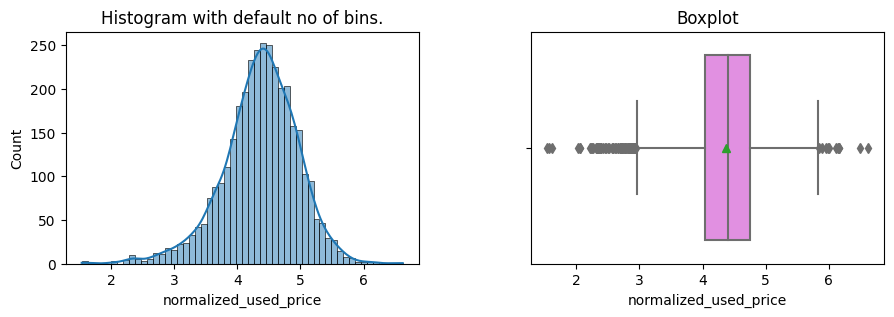

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'normalized_used_price':
creating_hist_box(df, 'normalized_used_price')

In [ ]:
df['normalized_used_price'].describe()

count    3454.000000
mean        4.364712
std         0.588914
min         1.536867
25%         4.033931
50%         4.405133
75%         4.755700
max         6.619433
Name: normalized_used_price, dtype: float64

Observations: 

*   The distribution for the normalized price of the used/refurbished device is almost symmetrical.
*   The minimum normalized price of a used device stands at around 1.54 euros while the maximum normalized price is around 6.62 euros with a median value of 4.41 euros.
*   The median value of the normalized used price is slightly more than that of the average of 4.36 euros.
*   The standard deviation is around 0.59 euros.
*   There are outlier values for both the lower and higher ends for normalized used prices of a device.
 





**`normalized_new_price`**

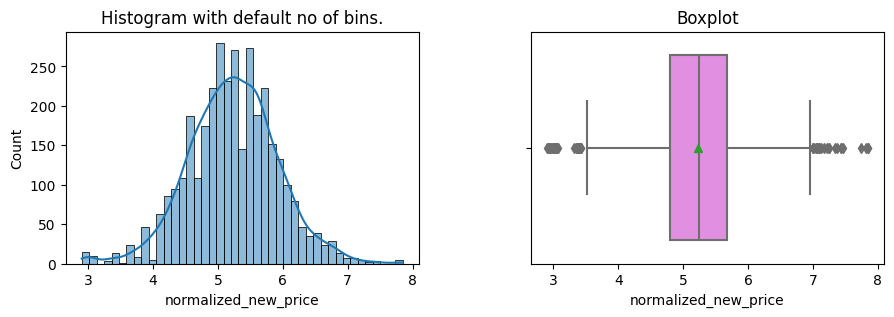

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'normalized_new_price':
creating_hist_box(df, 'normalized_new_price')

In [ ]:
df['normalized_new_price'].describe()

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64

Observations: 

*   The distribution for the normalized price of the new device of the same model as the used one is symmetrical.
*   The minimum normalized price of a new device stands at around 2.90 euros while the maximum normalized price is around 7.85 euros with a median value of 5.25 euros.
*   The median value of the normalized new price is slightly more than that of the average of 5.23 euros.
*   The standard deviation is around 0.68 euros.
*   There are outlier values for both the lower and higher ends for the distribution of normalized new prices of the devices.

**`screen_size`**

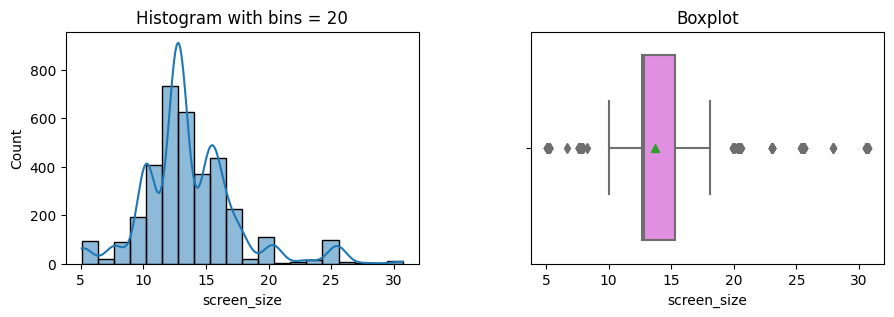

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'screen_size':
creating_hist_box(df, 'screen_size', bins=20)

In [ ]:
df['screen_size'].describe()

count    3454.000000
mean       13.713115
std         3.805280
min         5.080000
25%        12.700000
50%        12.830000
75%        15.340000
max        30.710000
Name: screen_size, dtype: float64

Observations: 

*   The distribution for the screen size of used cellphones/tablets is very slightly right skewed with multiple peaks.
*   The minimum screen size of the devices stands at around 5.08 cm while the maximum screen size is around 30.71 cm with a median value of 12.83 cm.
*   The median value of the screen size is slightly less than that of the average of 13.71 cm.
*   The standard deviation is around 3.81 cm.
*   There are outlier values for both the higher and lower ends for the distribution of normalized new prices of the devices.

**`main_camera_mp`**

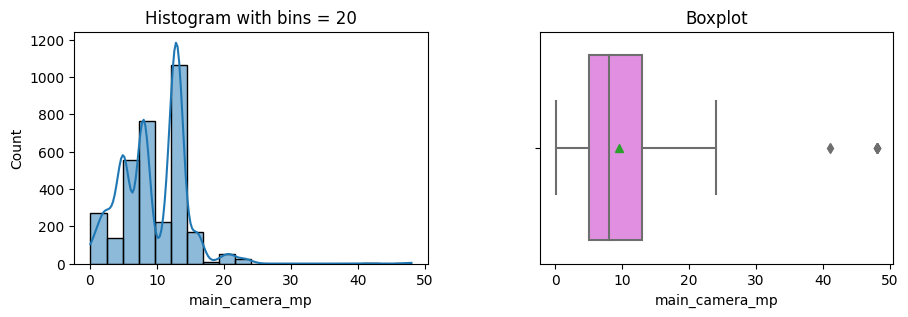

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'main_camera_mp':
creating_hist_box(df, 'main_camera_mp', bins = 20)

In [ ]:
df['main_camera_mp'].describe()

count    3275.000000
mean        9.460208
std         4.815461
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        48.000000
Name: main_camera_mp, dtype: float64

Observations: 

*   The distribution for the resolution of the rear camera of the used devices is right-skewed with multiple peaks.
*   The minimum resolution of the rear camera of the used devices stands at around 0.08 MP while the maximum resolution is around 48 MP with a median value of 8 MP.
*   The median value of the rear camera resolution is less than that of the average of 9.46 MP.
*   The standard deviation is around 4.82 MP.
*   There are outlier values at the higher end of the plot for the rear camera resolution of the devices.

**`selfie_camera_mp`**

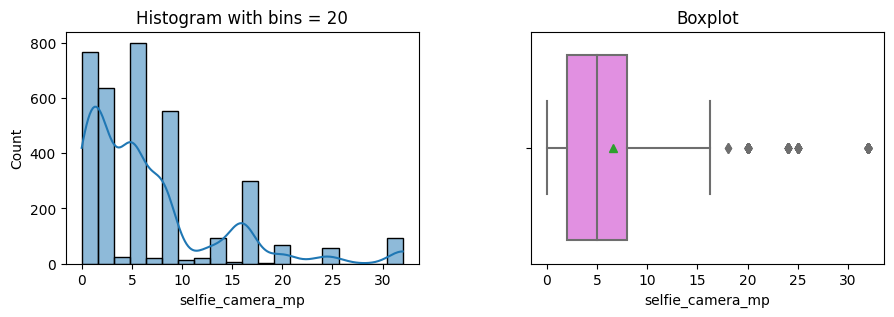

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'selfie_camera_mp':
creating_hist_box(df,'selfie_camera_mp', bins = 20)

In [ ]:
df['selfie_camera_mp'].describe()

count    3452.000000
mean        6.554229
std         6.970372
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64

Observations: 

*   The distribution for the resolution of the front camera of the used devices is right-skewed with multiple peaks.
*   The minimum resolution of the front camera of the used devices stands at around 0 MP while the maximum resolution is around 32 MP with a median value of 5 MP.
*   The median value of the rear camera resolution is less than that of the average of 6.55 MP.
*   The standard deviation is around 6.97 MP.
*   There are outlier values at the higher end of the plot for the rear camera resolution of the devices.

**`int_memory`**

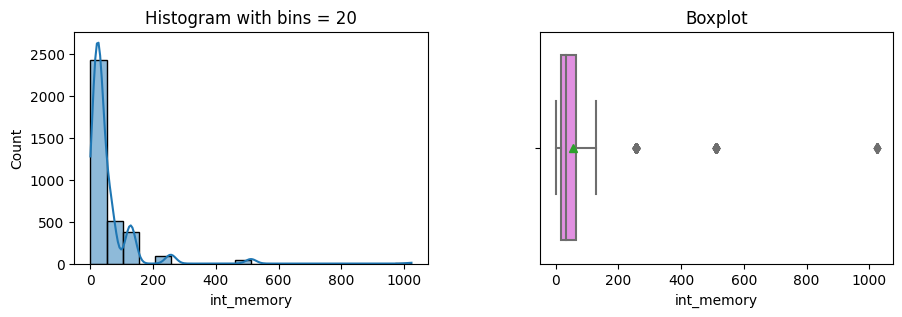

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'int_memory':
creating_hist_box(df, 'int_memory', bins = 20)

In [ ]:
df['int_memory'].describe()

count    3450.000000
mean       54.573099
std        84.972371
min         0.010000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64

Observations: 

*   The distribution for the amount of internal memory of the devices is highly right-skewed with multiple peaks.
*   The minimum amount of internal storage present in a device stands at around 0.10 GB while the maximum internal storage is around 1024 GB with a median value of 32 GB.
*   The median value of the amount of internal storage present in a device is less than that of the average of 54.57 GB.
*   The standard deviation is around 84.97 GB.
*   There are outlier values at the higher end of the distribution for the amount of internal storage of the devices.

**`ram`**

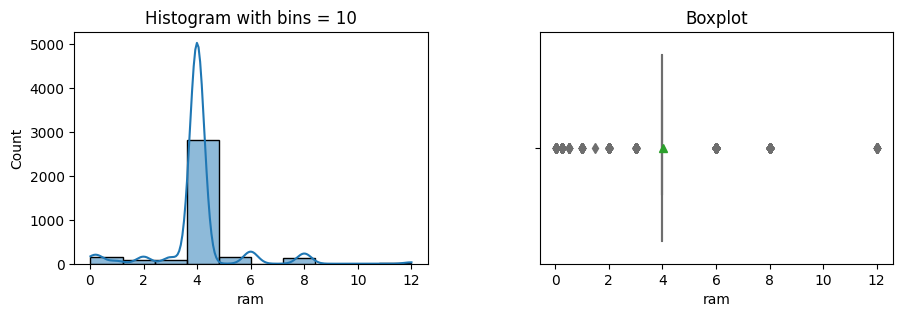

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'ram':
creating_hist_box(df,'ram', bins=10)

In [ ]:
df['ram'].describe()

count    3450.000000
mean        4.036122
std         1.365105
min         0.020000
25%         4.000000
50%         4.000000
75%         4.000000
max        12.000000
Name: ram, dtype: float64

Observations: 

*   The distribution for the amount of RAM present in the devices is almost symmetrical.
*   The minimum amount of RAM present in the devices stands at around 0.02 GB while the maximum amount of RAM present is around 12 GB with a median value of 4 GB.
*   The median value of the amount of RAM present in the devices is almost equal to that of the average of 4.03 GB.
*   The standard deviation is around 1.37 GB.
*   There are outliers present in the distribution of the amount of RAM present in the devices.
*   The values for the 25th, 50th, and 75th percentiles for the amount of RAM present in the devices are equal, ie 4GB.







**`weight`**

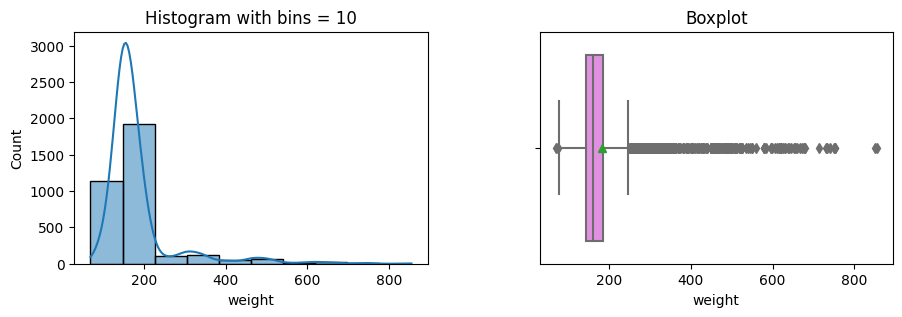

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'weight':
creating_hist_box(df, 'weight', bins=10)

In [ ]:
df['weight'].describe()

count    3447.000000
mean      182.751871
std        88.413228
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64

Observations: 

*   The distribution for the weight of the devices is right-skewed.
*   The minimum weight of the devices stands at 69 grams while the maximum weight is 855 grams with a median value of 160 grams.
*   The median value of the weight of a device is less than that of the average of 182.75 grams.
*   The standard deviation is around 88.41 GB.
*   There are outliers present in the distribution of the weight of the devices.




**`battery`**

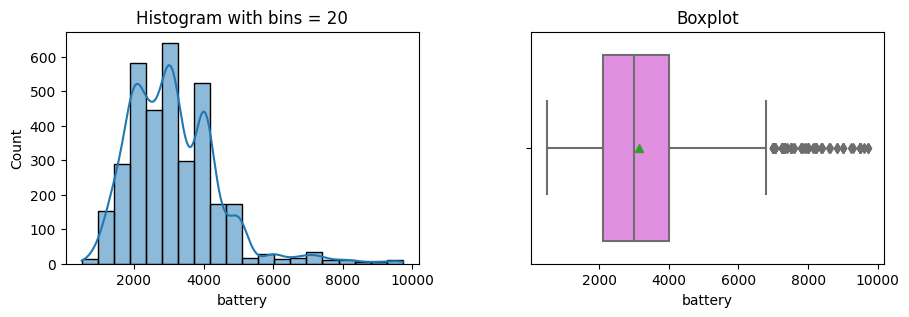

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'battery':
creating_hist_box(df, 'battery', bins= 20)

In [ ]:
df['battery'].describe()

count    3448.000000
mean     3133.402697
std      1299.682844
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

Observations: 

*   The distribution for the energy capacity of the battery of the device is slightly right-skewed.
*   The minimum energy capacity of the battery of the devices stands at 500 mAh while the maximum capacity of the same is 9720 mAh with a median value of 3000 mAh.
*   The median value of the weight of a device is less than that of the average of 3133.40 mAh.
*   The standard deviation is around 1299.68 mAh.
*   There are outliers present in the higher end of the distribution of energy capacity of the battery of the  cell phones.

**`days_used`**

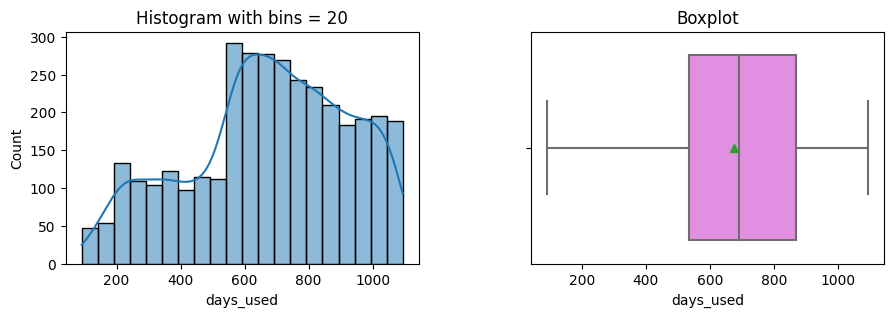

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'days_used':
creating_hist_box(df, 'days_used', bins=20)

In [ ]:
df['days_used'].describe()

count    3454.000000
mean      674.869716
std       248.580166
min        91.000000
25%       533.500000
50%       690.500000
75%       868.750000
max      1094.000000
Name: days_used, dtype: float64

Observations: 

*   The distribution for the number of days the old device has been used is left-skewed.
*   The minimum number of days a device has been used is 91 while the maximum number of days a device has been used is 1094 with a median value of 690.5 days.
*   The median value of the number of days a device has been used is more than that of the average of around 674.87 days.
*   The standard deviation is around 248.58 days.

**`brand_name`**

In [ ]:
len(list(df['brand_name'].unique()))

34

In [ ]:
df['brand_name'].value_counts().head()

Others     502
Samsung    341
Huawei     251
LG         201
Lenovo     171
Name: brand_name, dtype: int64

In [ ]:
df['brand_name'].value_counts().tail()

BlackBerry    22
Microsoft     22
OnePlus       22
Google        15
Infinix       10
Name: brand_name, dtype: int64

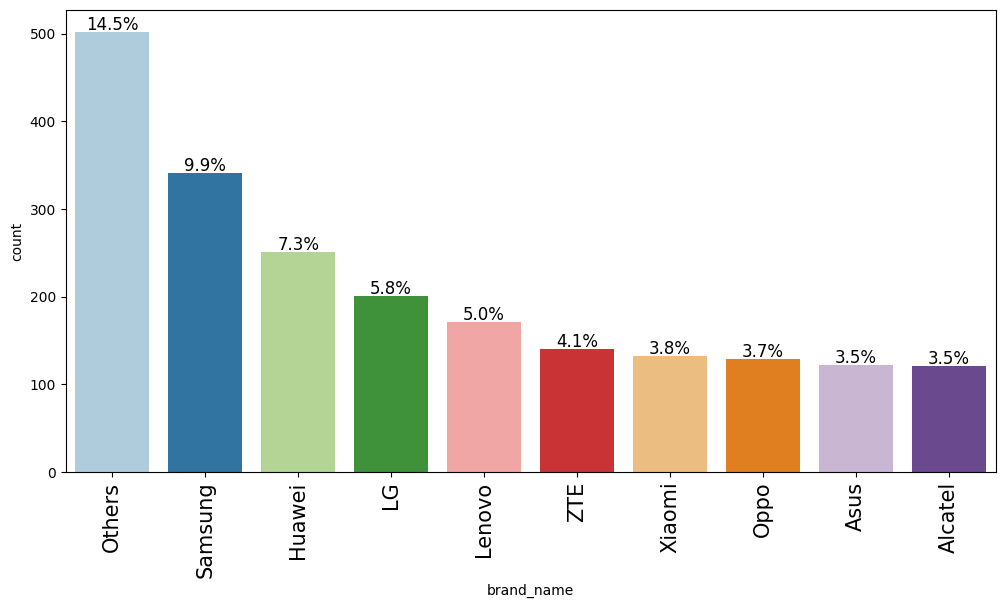

In [ ]:
# Countplot of different brands in the dataset: 
labeled_barplot(df, "brand_name", perc=True, n=10)

Observations: 

*   There are 34 unique brands in the dataset.
*   The most commonly occurring brand in the dataset is labeled as 'Others' (14.5% of the number of records).
*   The other commonly occurring brands are Samsung, Huawei, LG, and Lenovo.
*   The least commonly occurring brands in the dataset are BlackBerry, Microsoft, OnePlus, and Infinix.,

**`os`**

In [ ]:
list(df['os'].unique())

['Android', 'Others', 'iOS', 'Windows']

In [ ]:
df['os'].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

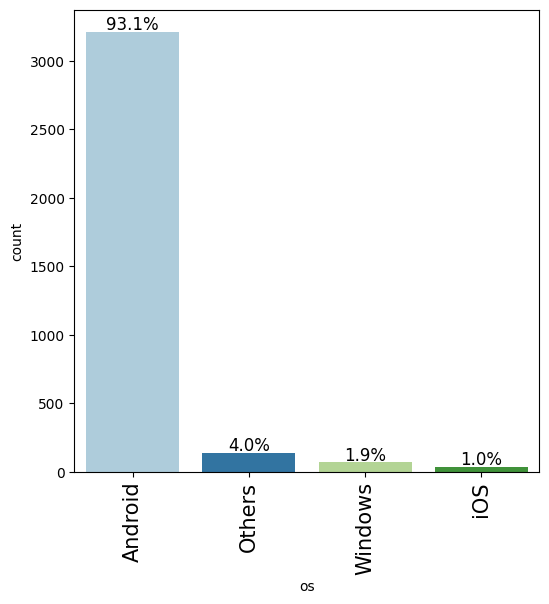

In [ ]:
# Countplot of different operating systems in the dataset: 
labeled_barplot(df, "os", perc=True)

Observations:

*   There are 4 types of operating systems in the dataset on which the used devices run: Android, Windows, iOS, and Others.
*   Most devices use the Android operating system, i.e 93.1%
*   iOS operating system is used by the least number of devices, i.e only 1%
*   Any devices that have operating systems other than Android, Windows, and iOS are categorized to have 'Others' as their operating system.



**`4g`**

In [ ]:
list(df['4g'].unique())

['yes', 'no']

In [ ]:
df['4g'].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

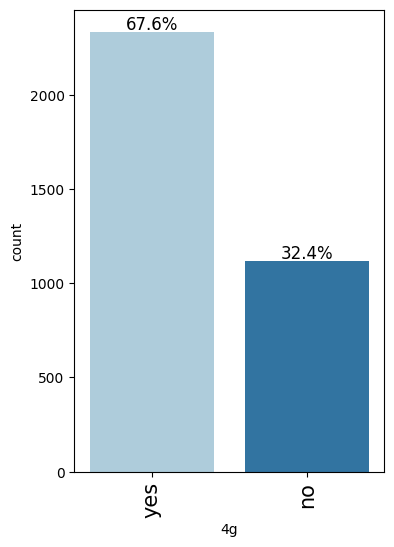

In [ ]:
# Countplot to check the no. of 4g supported and unsupported devices in the dataset: 
labeled_barplot(df, "4g", perc=True)

Observations: 

*   The column 4g tells us whether the device supports a 4g network('yes') or not('no').
*   The number of devices that support the 4g network is 2335 (i.e., 67.6%), while those that do not support the 4g network is 1119 (i.e., 32.4%).



**`5g`**

In [ ]:
list(df['5g'].unique())

['no', 'yes']

In [ ]:
df['5g'].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

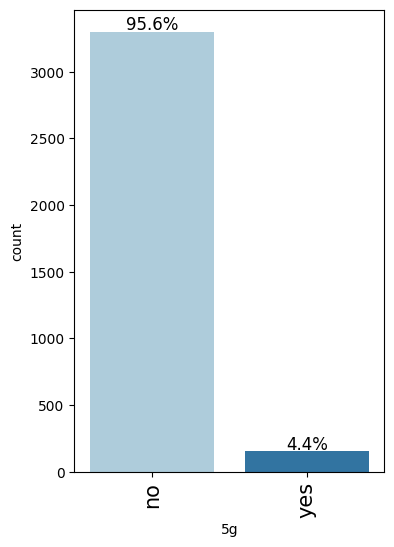

In [ ]:
# Countplot to check the no. of 5g supported and unsupported devices in the dataset: 
labeled_barplot(df, "5g", perc=True)

Observations: 

*   The column 5g tells us whether the device supports a 5g network ('yes') or not('no').
*   The number of devices that support a 5g network is 152 (i.e., 4.4%), while those that do not support a 5g network is 3302 (i.e., 95.6%).

In [ ]:
# Finding the no. of devices that support 4g and not 5g:
only_4g = df.loc[(df['4g']=='yes') & (df['5g']=='no')]
print(only_4g.shape[0])

2183


In [ ]:
# Finding the no. of devices that support 5g and not 4g: 
only_5g = df.loc[(df['5g']=='yes') & (df['4g']=='no')]
print(only_5g.shape[0])

0


In [ ]:
# Finding the no. of devices that support both 4g and 5g
both_4g_5g = df.loc[(df['4g']=='yes') & (df['5g']=='yes')]
print(both_4g_5g.shape[0])

152


Observations: 

*   The number of used devices that only support 4g is 2183.
*   None of the used devices only support 5g.
*   The number of used devices that support both 4g and 5g is 152.
*   Thus, the devices which support 5g also support 4g, while the ones that support 4g might not support 5g.






**`release_year`**

In [ ]:
print(sorted(list(df['release_year'].unique())))

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [ ]:
device_by_release_year = df.groupby('release_year').agg(number=('brand_name','count'))
device_by_release_year.sort_values(by='number', ascending=False)

number
release_year        
2014             642
2013             570
2015             515
2019             446
2016             383
2018             322
2017             299
2020             277

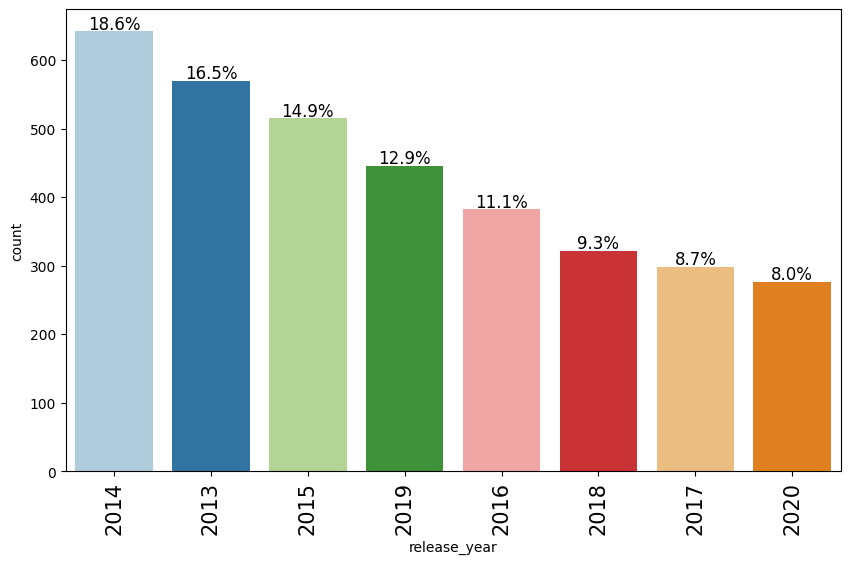

In [ ]:
# Countplot for 'release_year':
labeled_barplot(df, "release_year", perc=True)

Observations: 

*   The model release years in the data are from 2013 to 2020.
*   The dataset has the highest number of user devices from the years 2014, 2013, and 2015.
*   The dataset has the least number of used devices from the year 2020.



### Bivariate Analysis

**Correlation Check**

In [ ]:
# column_list contains the names of the 'number' columns in the dataset to check for correlation:
# release_year is a temporal variable and hence, not included in correlation table.
column_list = df.select_dtypes(include=np.number).columns.to_list()
column_list.remove('release_year')
column_list

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [ ]:
df[column_list].corr()

screen_size  main_camera_mp  selfie_camera_mp  \
screen_size               1.000000        0.150316          0.271640   
main_camera_mp            0.150316        1.000000          0.429264   
selfie_camera_mp          0.271640        0.429264          1.000000   
int_memory                0.071291        0.018766          0.296426   
ram                       0.274449        0.260802          0.477411   
battery                   0.813533        0.248563          0.369709   
weight                    0.828890       -0.087738         -0.004997   
days_used                -0.291723       -0.144672         -0.552636   
normalized_used_price     0.614785        0.587302          0.608074   
normalized_new_price      0.460889        0.541655          0.475479   

                       int_memory       ram   battery    weight  days_used  \
screen_size              0.071291  0.274449  0.813533  0.828890  -0.291723   
main_camera_mp           0.018766  0.260802  0.248563 -0.087738  -0.144672   
selfie_camera_mp         0.296426  0.477411  0.369709 -0.004997  -0.552636   
int_memory               1.000000  0.122496  0.117736  0.014948  -0.242712   
ram                      0.122496  1.000000  0.280740  0.089916  -0.280066   
battery                  0.117736  0.280740  1.000000  0.703388  -0.370895   
weight                   0.014948  0.089916  0.703388  1.000000  -0.067470   
days_used               -0.242712 -0.280066 -0.370895 -0.067470   1.000000   
normalized_used_price    0.190993  0.520289  0.613619  0.382354  -0.358264   
normalized_new_price     0.195992  0.532056  0.470754  0.269540  -0.216625   

                       normalized_used_price  normalized_new_price  
screen_size                         0.614785              0.460889  
main_camera_mp                      0.587302              0.541655  
selfie_camera_mp                    0.608074              0.475479  
int_memory                          0.190993              0.195992  
ram                                 0.520289              0.532056  
battery                             0.613619              0.470754  
weight                              0.382354              0.269540  
days_used                          -0.358264             -0.216625  
normalized_used_price               1.000000              0.834496  
normalized_new_price                0.834496              1.000000

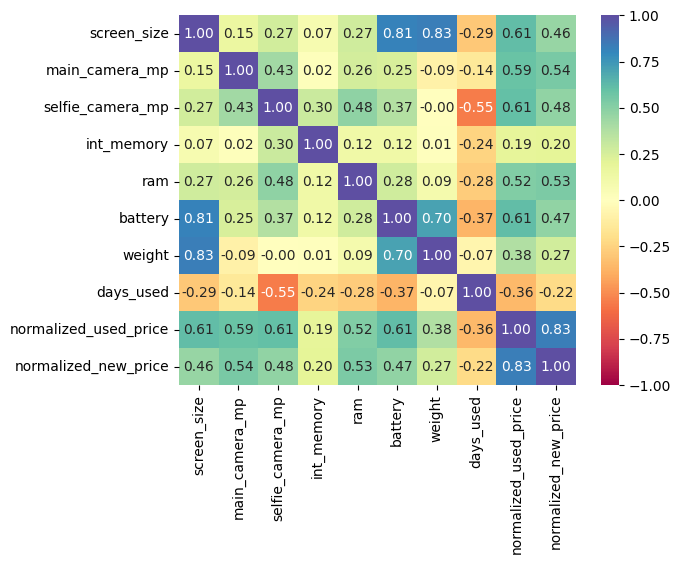

In [ ]:
#Heatmap showing correlation values between different variables.
sns.heatmap(df[column_list].corr(), vmin=-1, vmax=1, annot=True, fmt='0.2f', cmap='Spectral')
plt.show()

Observations: 
*   While the number of days the refurbished device has been used is negatively correlated with all the other variables, it is most negatively correlated with the resolution of the front camera (at a value of -0.55).
*   The no. of days the refurbished device has been used is negatively correlated with the normalized price of the used device (at a value of -0.36) as well as the normalized price of a new phone of the same model (at a value of -0.22).
*   Normalised price of the used device is positively correlated to that of the new device of the same model(high value of 0.83)
*   Screen size of the used device is positively correlated with its battery capacity (high value of 0.81) and its weight (high value of 0.83). 
*  Normalised price of the used device is positively correlated to all the other variables except the number of days it has been used.
*   Normalised price of the new device of the same model is also positively correlated to all the other variables except the no. of days it has been used.
*   Weight of the used device does not correlate with the resolution of front camera.
*   Also, weight of the used device has negative correlation with the resolution of front camera(low value of -0.09).









**Let's see how the price of used devices varies across the years.**

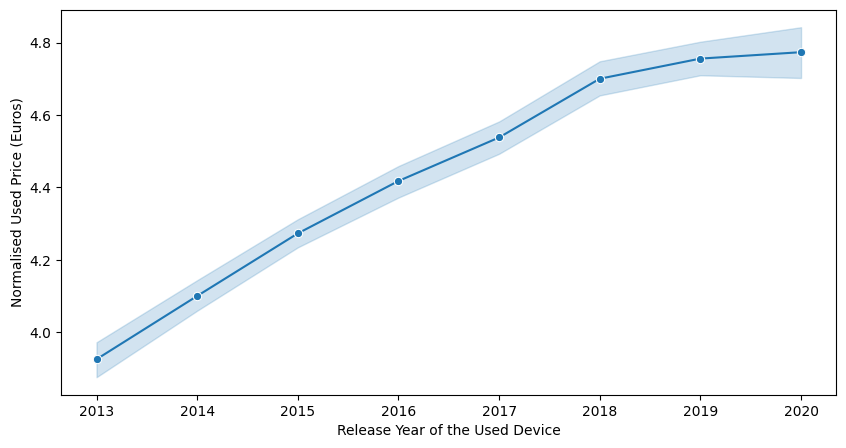

In [ ]:
# Line plot showing mean normalised prices (in euros) vs release_year of the used devices:
plt.figure(figsize = (10,5))
sns.lineplot(data= df, x='release_year', y='normalized_used_price', marker='o', markersize=6) 
plt.xlabel('Release Year of the Used Device')
plt.ylabel('Normalised Used Price (Euros)')
plt.show()

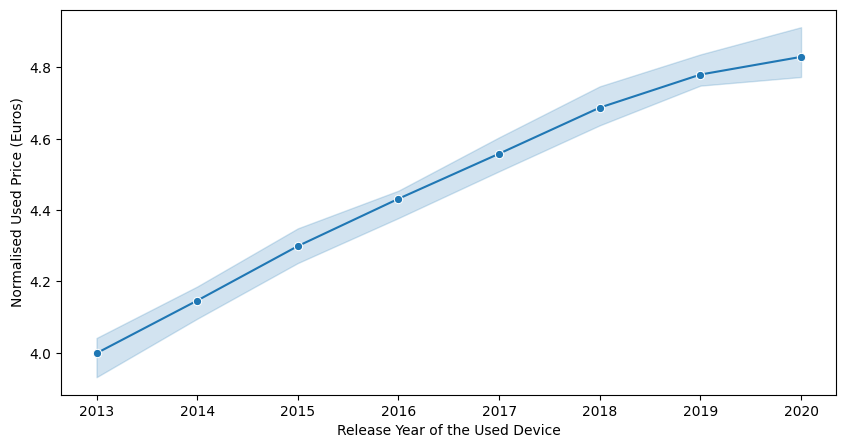

In [ ]:
# Line plot showing median normalised prices (in euros) vs release_year of the used devices:
plt.figure(figsize = (10,5))
sns.lineplot(data= df, x='release_year', y='normalized_used_price', marker='o', markersize=6, estimator='median') 
plt.xlabel('Release Year of the Used Device')
plt.ylabel('Normalised Used Price (Euros)')
plt.show()

Observations: 

*   Both the average and median prices of used devices have been increasing from 2013 to 2020. 



**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

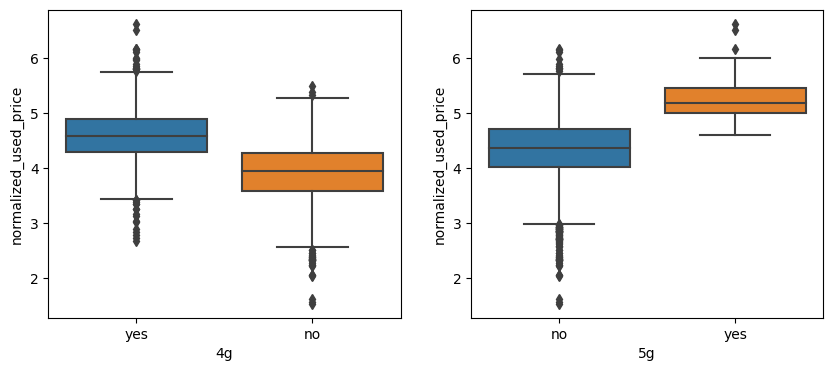

In [ ]:
# Boxplot for normalised_used_price vs '4g' and '5g':
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

In [ ]:
df.groupby(['4g'])['normalized_used_price'].describe()

count      mean       std       min       25%       50%       75%  \
4g                                                                        
no   1119.0  3.896332  0.566646  1.536867  3.582268  3.949897  4.263876   
yes  2335.0  4.589173  0.451344  2.667228  4.297081  4.573267  4.881020   

          max  
4g             
no   5.494953  
yes  6.619433

In [ ]:
df.groupby(['5g'])['normalized_used_price'].describe()

count      mean       std       min       25%       50%       75%  \
5g                                                                        
no   3302.0  4.325089  0.567316  1.536867  4.014986  4.372292  4.705264   
yes   152.0  5.225482  0.338917  4.602667  4.993617  5.178265  5.448899   

          max  
5g             
no   6.158969  
yes  6.619433

Observations: 

*   Refurbished devices that support a 4g network have higher mean, median, minimum, and maximum values of normalized used price as compared to those that do not support a 4g network. 
*   Similarly, refurbished devices that support a 5g network have higher mean, median, minimum, and maximum values of normalized used price as compared to those that do not support a 5g network.
*   Refurbished devices that support a 4g network have a lower mean and median values of normalized used price as compared to those that support a 5g network
*   Refurbished devices that do not support a 4g network also have a lower mean and median values of normalized used price as compared to those that do not support a 5g network.



**screen_size vs normalized_used_price**

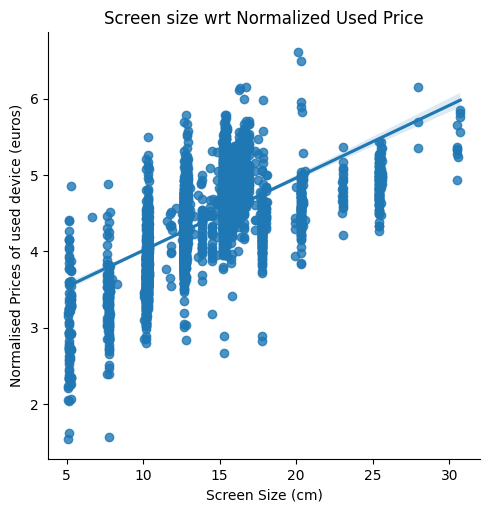

In [ ]:
# lmplot for screen_size vs normalized_used_price:
sns.lmplot(data=df, x='screen_size', y='normalized_used_price')
plt.xlabel('Screen Size (cm)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Screen size wrt Normalized Used Price')
plt.show()

Observations: 

*   With an increase in main camera resolution, normalized prices of the used devices increases.

**main_camera_mp vs normalized_used_price**

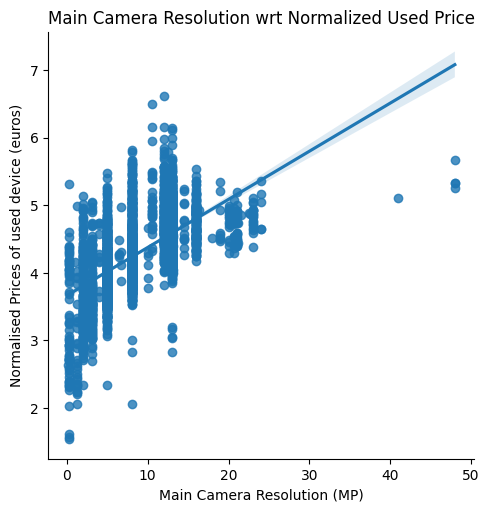

In [ ]:
# lmplot for main_camera_mp vs normalized_used_price:
sns.lmplot(data=df, x='main_camera_mp', y='normalized_used_price')
plt.xlabel('Main Camera Resolution (MP)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Main Camera Resolution wrt Normalized Used Price')
plt.show()

Observations: 

*   With an increase in main camera resolution, normalized prices of the used devices increases.

**front_camera_mp vs normalized_used_price**

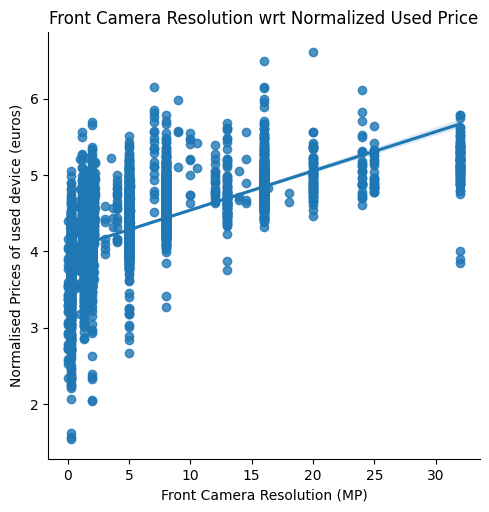

In [ ]:
# lmplot for selfie_camera_mp vs normalized_used_price:
sns.lmplot(data=df, x='selfie_camera_mp', y='normalized_used_price')
plt.xlabel('Front Camera Resolution (MP)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Front Camera Resolution wrt Normalized Used Price')
plt.show()

Observations: 

*   With an increase in front camera resolution, normalized prices of the used devices increases.

**weight vs normalized_used_price**

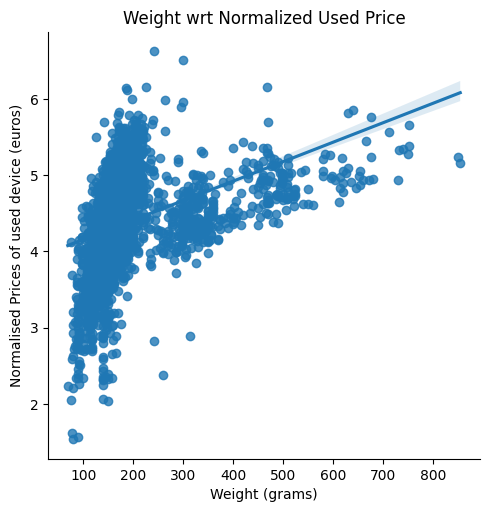

In [ ]:
# lmplot for weight vs normalized_used_price:
sns.lmplot(data=df, x='weight', y='normalized_used_price')
plt.xlabel('Weight (grams)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Weight wrt Normalized Used Price')
plt.show()

Observations: 

*   With an increase in weight, normalized prices of the used devices increases.

**int_memory vs normalized_used_price**

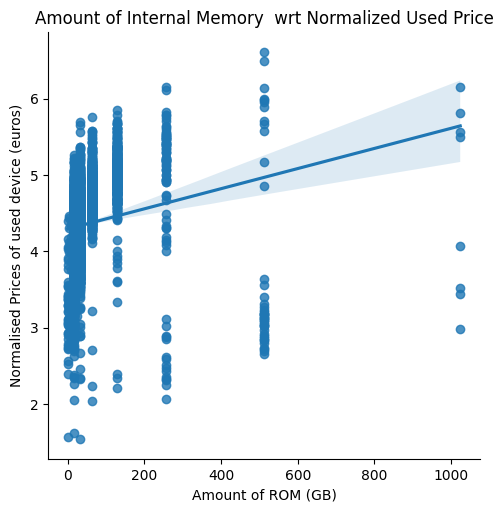

In [ ]:
# lmplot for int_memory vs normalized_used_price:
sns.lmplot(data=df, x='int_memory', y='normalized_used_price')
plt.xlabel('Amount of ROM (GB)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Amount of Internal Memory  wrt Normalized Used Price')
plt.show()

Observations: 

*   With an increase in the amount of Internal memory present in the device, normalized prices of the used devices increases.

**ram vs normalized_used_price**

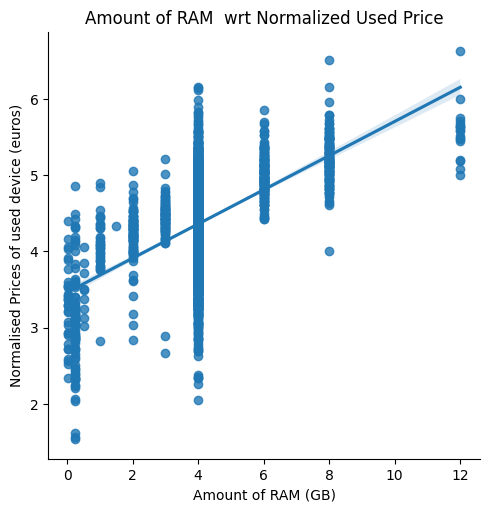

In [ ]:
# lmplot for ram vs normalized_used_price:
sns.lmplot(data=df, x='ram', y='normalized_used_price')
plt.xlabel('Amount of RAM (GB)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Amount of RAM  wrt Normalized Used Price')
plt.show()

Observations: 

*   With an increase in the amount of internal memory present in the device, normalized prices of the used devices increases.

**battery vs normalized_used_price**

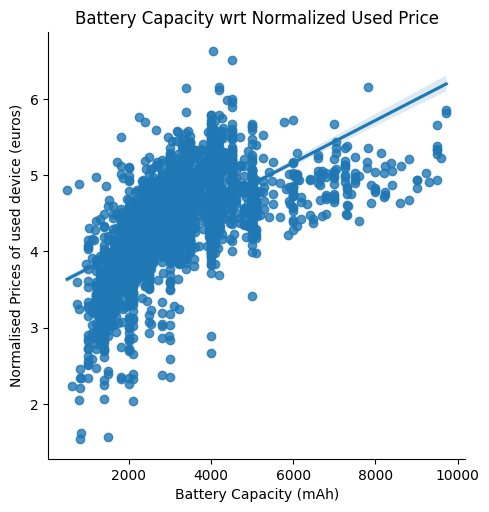

In [ ]:
# lmplot for battery vs normalized_used_price:
sns.lmplot(data=df, x='battery', y='normalized_used_price')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Battery Capacity wrt Normalized Used Price')
plt.show()

Observations: 

*   With an increase in the battery capacity of a device, normalized prices of the used devices increases.

**days_used vs normalized_used_price**

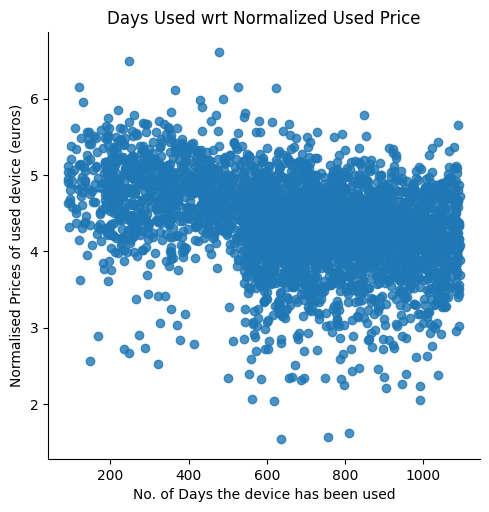

In [ ]:
# lmplot for days_used vs normalized_used_price:
sns.lmplot(data=df, x='days_used', y='normalized_used_price')
plt.xlabel('No. of Days the device has been used')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Days Used wrt Normalized Used Price')
plt.show()

Observations: 

*   With an increase in the number of days a device has been used, normalized prices of the used devices decrease.

## Questions: 
   (Dataset used to answer the below questions contains missing values, i.e, imputations have not been performed yet.)

**Q1 : What does the distribution of normalized used device prices look like?**

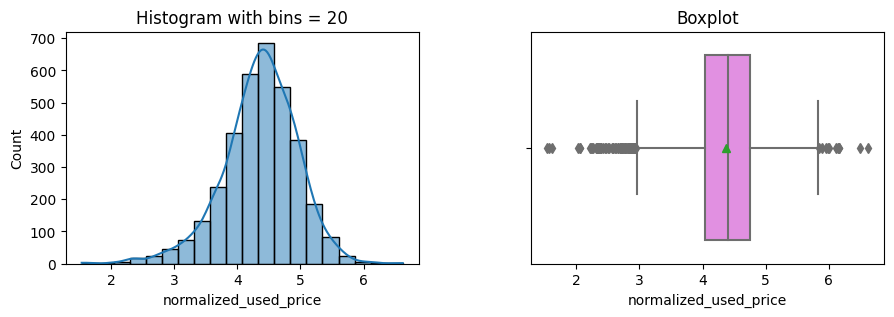

In [ ]:
creating_hist_box(df, 'normalized_used_price', bins=20)

In [ ]:
df['normalized_used_price'].describe()

count    3454.000000
mean        4.364712
std         0.588914
min         1.536867
25%         4.033931
50%         4.405133
75%         4.755700
max         6.619433
Name: normalized_used_price, dtype: float64

Observations: 

*   Normalised price for refurbished devices is almost symmetrical.
*   The average normalized price for used devices is 4.36 euros while the median for the same is 4.41 euros.
*   The standard deviation is almost 0.59 euros. 
*   The highest normalized price for used devices is 6.62 euros while the lowest is 1.54 euros. 
*   There are outliers in both the upper and lower ends of the distribution for normalized prices of used devices.









**Q2 : What percentage of the used device market is dominated by Android devices?**

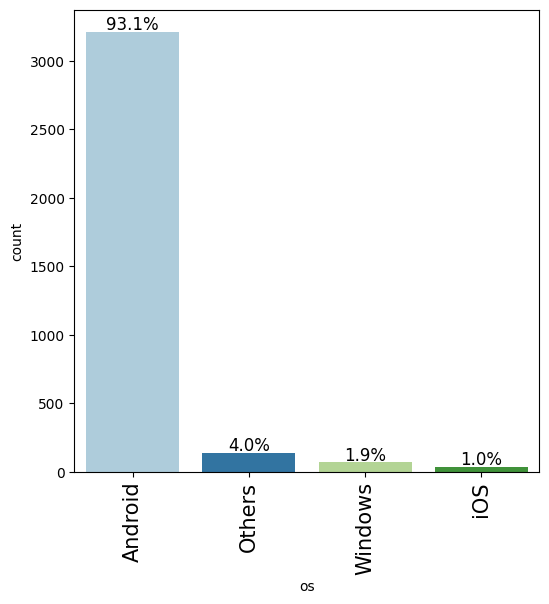

In [ ]:
labeled_barplot(df, "os", perc=True)

In [ ]:
devices_by_os = df.groupby(['os']).agg(no_of_devices=('os','count')).reset_index()
devices_by_os['percentage'] = round((devices_by_os['no_of_devices']/df.shape[0])*100,1)
print(devices_by_os)

        os  no_of_devices  percentage
0  Android           3214        93.1
1   Others            137         4.0
2  Windows             67         1.9
3      iOS             36         1.0


In [ ]:
print(devices_by_os.loc[devices_by_os['os']=='Android','percentage'][0])

93.1


Observations:

*   Android dominates the used cell phone market by 93.1%.



**Q3 : The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

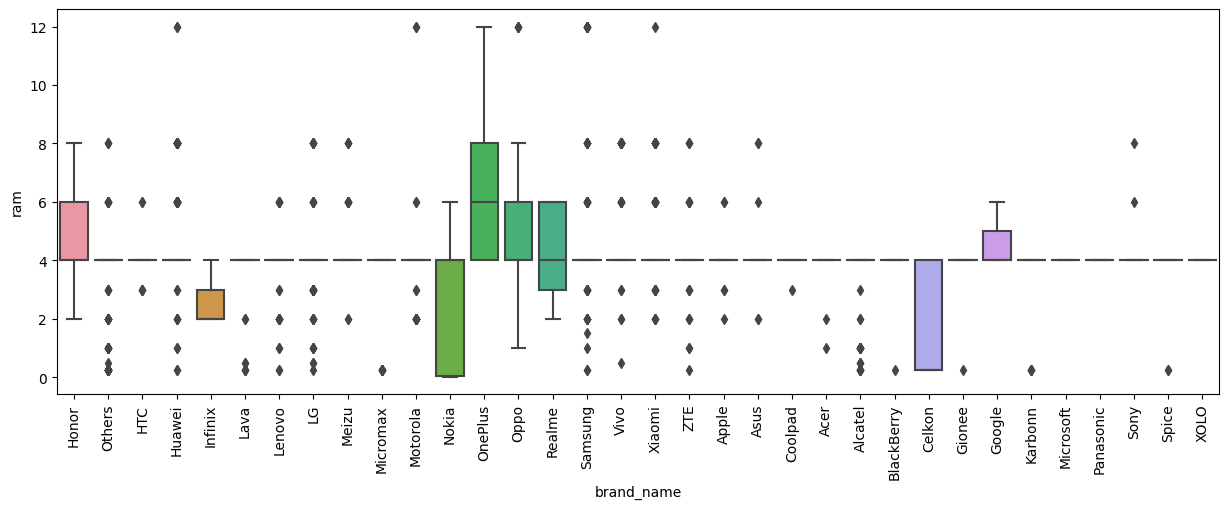

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [ ]:
phones_by_brand_desc = df.groupby(['brand_name'])['ram'].describe().sort_values(by='50%', ascending=False)
phones_by_brand_desc

count      mean       std   min   25%   50%  75%   max
brand_name                                                        
OnePlus      22.0  6.363636  2.592029  4.00  4.00  6.00  8.0  12.0
Acer         51.0  3.901961  0.500196  1.00  4.00  4.00  4.0   4.0
Panasonic    47.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
Microsoft    22.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
Motorola    106.0  3.943396  1.329735  2.00  4.00  4.00  4.0  12.0
Nokia       102.0  2.420294  1.889325  0.02  0.03  4.00  4.0   6.0
Oppo        129.0  4.961240  2.122804  1.00  4.00  4.00  6.0  12.0
Others      502.0  3.777888  1.015827  0.25  4.00  4.00  4.0   8.0
Realme       41.0  4.195122  1.327018  2.00  3.00  4.00  6.0   6.0
Alcatel     121.0  3.407025  1.263730  0.25  4.00  4.00  4.0   4.0
Samsung     341.0  4.199413  1.377140  0.25  4.00  4.00  4.0  12.0
Sony         86.0  4.069767  0.479968  4.00  4.00  4.00  4.0   8.0
Spice        30.0  3.750000  0.951405  0.25  4.00  4.00  4.0   4.0
Vivo        117.0  4.756410  1.638196  0.50  4.00  4.00  4.0   8.0
XOLO         49.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
Xiaomi      132.0  4.583333  1.508458  2.00  4.00  4.00  4.0  12.0
Micromax    117.0  3.679487  1.052934  0.25  4.00  4.00  4.0   4.0
Meizu        62.0  4.451613  1.223773  2.00  4.00  4.00  4.0   8.0
Lenovo      171.0  3.885965  0.774222  0.25  4.00  4.00  4.0   6.0
Lava         36.0  3.277778  1.413933  0.25  4.00  4.00  4.0   4.0
LG          201.0  3.936567  1.076461  0.25  4.00  4.00  4.0   8.0
Karbonn      29.0  3.353448  1.441597  0.25  4.00  4.00  4.0   4.0
Huawei      251.0  4.655378  1.595387  0.25  4.00  4.00  4.0  12.0
Honor       116.0  4.603448  1.625232  2.00  4.00  4.00  6.0   8.0
HTC         110.0  4.000000  0.331801  3.00  4.00  4.00  4.0   6.0
Google       15.0  4.533333  0.915475  4.00  4.00  4.00  5.0   6.0
Gionee       56.0  3.933036  0.501115  0.25  4.00  4.00  4.0   4.0
Coolpad      22.0  3.954545  0.213201  3.00  4.00  4.00  4.0   4.0
BlackBerry   22.0  3.829545  0.799503  0.25  4.00  4.00  4.0   4.0
Asus        122.0  4.049180  0.600997  2.00  4.00  4.00  4.0   8.0
Apple        39.0  4.000000  0.606977  2.00  4.00  4.00  4.0   6.0
ZTE         140.0  4.023214  0.909530  0.25  4.00  4.00  4.0   8.0
Infinix      10.0  2.600000  0.843274  2.00  2.00  2.00  3.0   4.0
Celkon       33.0  1.613636  1.831891  0.25  0.25  0.25  4.0   4.0

In [ ]:
phones_by_brand_desc['min'].value_counts()

0.25    14
2.00     8
4.00     6
1.00     2
3.00     2
0.02     1
0.50     1
Name: min, dtype: int64

In [ ]:
phones_by_brand_desc['25%'].value_counts()

4.00    30
0.03     1
3.00     1
2.00     1
0.25     1
Name: 25%, dtype: int64

In [ ]:
phones_by_brand_desc['50%'].value_counts()

4.00    31
6.00     1
2.00     1
0.25     1
Name: 50%, dtype: int64

In [ ]:
phones_by_brand_desc['75%'].value_counts()

4.0    28
6.0     3
8.0     1
5.0     1
3.0     1
Name: 75%, dtype: int64

In [ ]:
phones_by_brand_desc['max'].value_counts()

4.0     14
8.0      8
12.0     6
6.0      6
Name: max, dtype: int64

In [ ]:
phones_by_brand_desc.reset_index(inplace = True)

In [ ]:
phones_by_brand_desc

brand_name  count      mean       std   min   25%   50%  75%   max
0      OnePlus   22.0  6.363636  2.592029  4.00  4.00  6.00  8.0  12.0
1         Acer   51.0  3.901961  0.500196  1.00  4.00  4.00  4.0   4.0
2    Panasonic   47.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
3    Microsoft   22.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
4     Motorola  106.0  3.943396  1.329735  2.00  4.00  4.00  4.0  12.0
5        Nokia  102.0  2.420294  1.889325  0.02  0.03  4.00  4.0   6.0
6         Oppo  129.0  4.961240  2.122804  1.00  4.00  4.00  6.0  12.0
7       Others  502.0  3.777888  1.015827  0.25  4.00  4.00  4.0   8.0
8       Realme   41.0  4.195122  1.327018  2.00  3.00  4.00  6.0   6.0
9      Alcatel  121.0  3.407025  1.263730  0.25  4.00  4.00  4.0   4.0
10     Samsung  341.0  4.199413  1.377140  0.25  4.00  4.00  4.0  12.0
11        Sony   86.0  4.069767  0.479968  4.00  4.00  4.00  4.0   8.0
12       Spice   30.0  3.750000  0.951405  0.25  4.00  4.00  4.0   4.0
13        Vivo  117.0  4.756410  1.638196  0.50  4.00  4.00  4.0   8.0
14        XOLO   49.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
15      Xiaomi  132.0  4.583333  1.508458  2.00  4.00  4.00  4.0  12.0
16    Micromax  117.0  3.679487  1.052934  0.25  4.00  4.00  4.0   4.0
17       Meizu   62.0  4.451613  1.223773  2.00  4.00  4.00  4.0   8.0
18      Lenovo  171.0  3.885965  0.774222  0.25  4.00  4.00  4.0   6.0
19        Lava   36.0  3.277778  1.413933  0.25  4.00  4.00  4.0   4.0
20          LG  201.0  3.936567  1.076461  0.25  4.00  4.00  4.0   8.0
21     Karbonn   29.0  3.353448  1.441597  0.25  4.00  4.00  4.0   4.0
22      Huawei  251.0  4.655378  1.595387  0.25  4.00  4.00  4.0  12.0
23       Honor  116.0  4.603448  1.625232  2.00  4.00  4.00  6.0   8.0
24         HTC  110.0  4.000000  0.331801  3.00  4.00  4.00  4.0   6.0
25      Google   15.0  4.533333  0.915475  4.00  4.00  4.00  5.0   6.0
26      Gionee   56.0  3.933036  0.501115  0.25  4.00  4.00  4.0   4.0
27     Coolpad   22.0  3.954545  0.213201  3.00  4.00  4.00  4.0   4.0
28  BlackBerry   22.0  3.829545  0.799503  0.25  4.00  4.00  4.0   4.0
29        Asus  122.0  4.049180  0.600997  2.00  4.00  4.00  4.0   8.0
30       Apple   39.0  4.000000  0.606977  2.00  4.00  4.00  4.0   6.0
31         ZTE  140.0  4.023214  0.909530  0.25  4.00  4.00  4.0   8.0
32     Infinix   10.0  2.600000  0.843274  2.00  2.00  2.00  3.0   4.0
33      Celkon   33.0  1.613636  1.831891  0.25  0.25  0.25  4.0   4.0

In [ ]:
phones_iqr_0 = phones_by_brand_desc.loc[(phones_by_brand_desc['25%'] == 4) & 
                                        (phones_by_brand_desc['25%'] == phones_by_brand_desc['50%']) & 
                                        (phones_by_brand_desc['50%'] == phones_by_brand_desc['75%'])
                                        ,'brand_name'].to_list()

In [ ]:
print('Brands with IQR = 0 (since 25% = 50% = 75% = 4GB) :')
print (*phones_iqr_0, sep=", ")

Brands with IQR = 0 (since 25% = 50% = 75% = 4GB) :
Acer, Panasonic, Microsoft, Motorola, Others, Alcatel, Samsung, Sony, Spice, Vivo, XOLO, Xiaomi, Micromax, Meizu, Lenovo, Lava, LG, Karbonn, Huawei, HTC, Gionee, Coolpad, BlackBerry, Asus, Apple, ZTE


In [ ]:
len(phones_iqr_0)

26

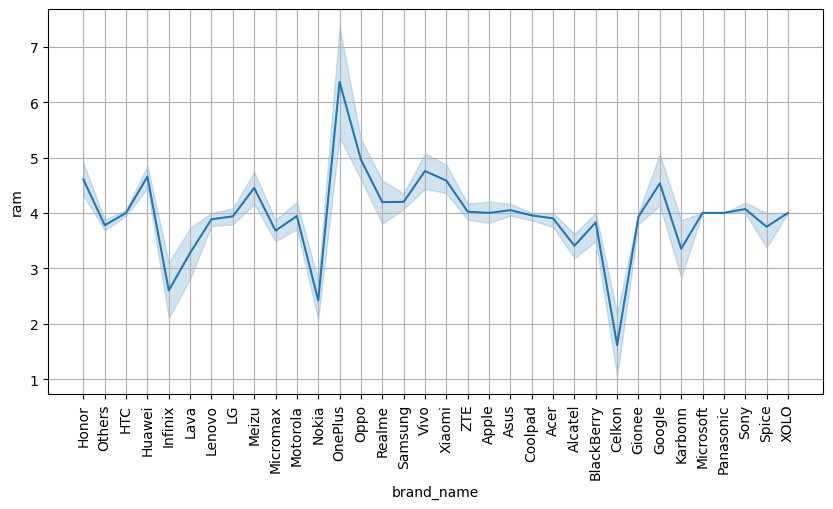

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='brand_name', y='ram')
plt.grid()
plt.xticks(rotation=90)
plt.show()

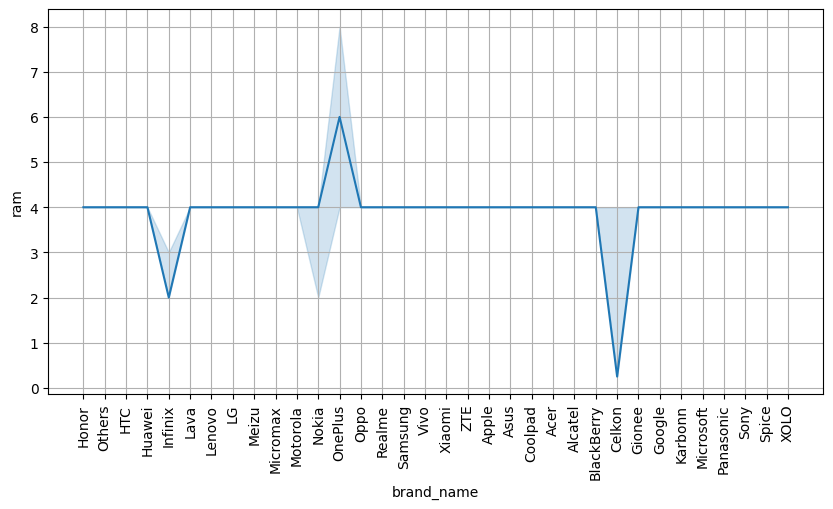

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='brand_name', y='ram', estimator='median')
plt.grid()
plt.xticks(rotation=90)
plt.show()

Observations: 

*   14 brands have a minimum value of 0.25 GB for the amount of RAM.
*   30 brands have a value of 4 GB as the 25th percentile for the amount of RAM.
*   31 brands have a value of 4 GB as the 50th percentile for the amount of RAM.
*   28 brands have a value of 4 GB as the 75th percentile for the amount of RAM.
*   14 brands have a maximum value of 4 GB for the amount of RAM.
*  Nokia and Celkon have similar minimum and 25th percentile values for the amount of RAM. 
*   Honor, RealMe and Infinix also have similar values for minimum and 25th percentile for the amount of RAM.
*   Honor, and Oppo have similar values for 75th percentile for the amount of RAM.
*   Nokia and Google have similar maximum values for the amount of RAM.
*   OnePlus has the highest minimum, 25th percentile, 50th percentile and 75th percentile and maximum values for the amount of RAM among all the brands.
*   26 brands have same value of 4 GB for their 25th percentile, 50th percentile and 75th percentile values for amount of RAM.
*   Honor and Oppo have similar inter-quartile ranges in terms of amount of RAM present in the devices. 
*   Nokia and Celkon have similar inter-quartile ranges in terms of amount of RAM present in the devices.
*   OnePlus has the highest inter-quartile ranges in terms of the amount of RAM present among the devices.

Also, from the line plot we can see that: 
*   OnePlus devices have the highest average mean amount of RAM present, while Celkon has the lowest average amount of RAM.
*   Other brands that have comparatively higher amounts of RAM (average) are Vivo, Huawei, Honor, and Google.
*   Other brands that have comparatively lower amounts of RAM (average) are Infinix and Nokia.










**Q4 : A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [ ]:
phone_large_battery = df.loc[df['battery']>4500]
phone_large_battery.shape

(341, 15)

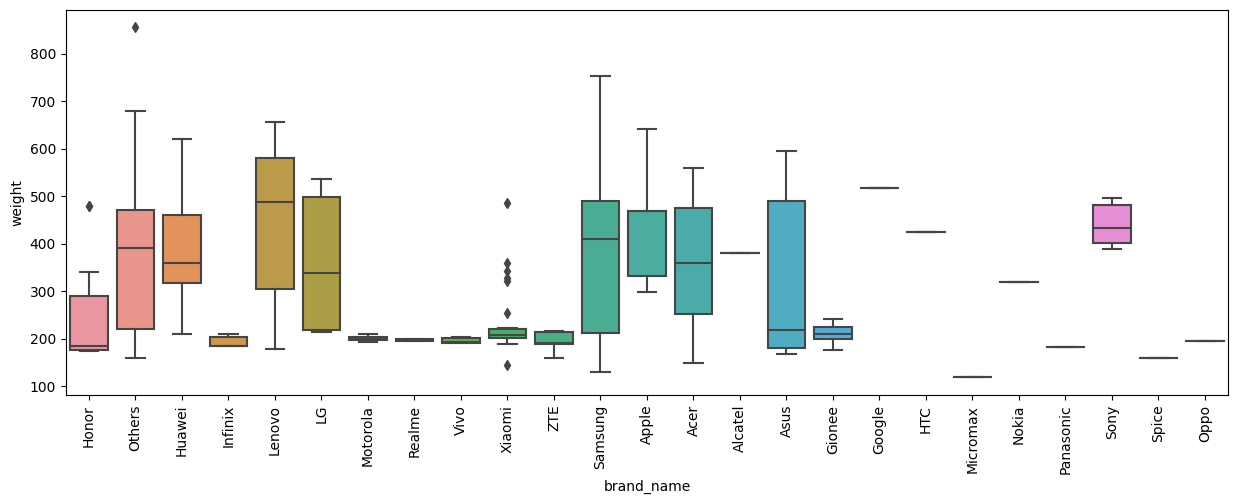

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=phone_large_battery,x='brand_name', y='weight') ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

In [ ]:
large_battery_desc = phone_large_battery.groupby(['brand_name'])['weight'].describe()
large_battery_desc['iqr'] = large_battery_desc['75%'] - large_battery_desc['25%']
large_battery_desc.sort_values(by='iqr')

count        mean         std    min     25%     50%     75%  \
brand_name                                                                 
Micromax      1.0  118.000000         NaN  118.0  118.00  118.00  118.00   
Alcatel       1.0  380.000000         NaN  380.0  380.00  380.00  380.00   
Spice         1.0  158.000000         NaN  158.0  158.00  158.00  158.00   
Google        1.0  517.000000         NaN  517.0  517.00  517.00  517.00   
HTC           1.0  425.000000         NaN  425.0  425.00  425.00  425.00   
Panasonic     1.0  182.000000         NaN  182.0  182.00  182.00  182.00   
Oppo          4.0  195.000000    0.000000  195.0  195.00  195.00  195.00   
Nokia         1.0  318.000000         NaN  318.0  318.00  318.00  318.00   
Realme       12.0  196.833333    1.946247  195.0  195.00  196.50  199.00   
Motorola     14.0  200.757143    4.957778  193.0  197.25  199.50  203.00   
Vivo         13.0  195.630769    5.373141  190.0  190.50  193.00  201.00   
Infinix       6.0  193.000000   12.393547  185.0  185.00  185.00  203.00   
Xiaomi       31.0  231.500000   67.522465  145.0  201.50  208.00  220.00   
Gionee       10.0  209.430000   21.824657  176.0  199.25  209.50  223.25   
ZTE          10.0  195.400000   18.209887  160.0  189.25  190.00  213.75   
Sony          6.0  439.500000   47.022335  389.0  401.25  432.50  481.00   
Honor        14.0  248.714286  110.972227  173.0  176.00  185.00  290.00   
Apple        17.0  439.558824  102.354452  299.0  331.00  468.00  469.00   
Huawei       37.0  394.486486  104.039154  210.0  316.00  360.00  460.00   
Acer          7.0  360.000000  165.950545  147.5  251.25  360.00  475.00   
Others       41.0  390.546341  173.226830  159.0  220.00  390.00  470.00   
Lenovo       28.0  442.721429  157.137292  177.0  305.00  487.50  580.00   
Samsung      50.0  398.352000  183.433545  130.4  212.50  410.00  489.25   
LG           12.0  366.058333  134.434238  213.0  218.00  338.95  498.00   
Asus         22.0  313.772727  160.729566  168.0  181.00  217.50  490.00   

              max     iqr  
brand_name                 
Micromax    118.0    0.00  
Alcatel     380.0    0.00  
Spice       158.0    0.00  
Google      517.0    0.00  
HTC         425.0    0.00  
Panasonic   182.0    0.00  
Oppo        195.0    0.00  
Nokia       318.0    0.00  
Realme      199.0    4.00  
Motorola    210.0    5.75  
Vivo        204.1   10.50  
Infinix     209.0   18.00  
Xiaomi      485.0   18.50  
Gionee      241.0   24.00  
ZTE         215.0   24.50  
Sony        495.0   79.75  
Honor       480.0  114.00  
Apple       641.0  138.00  
Huawei      620.0  144.00  
Acer        560.0  223.75  
Others      855.0  250.00  
Lenovo      655.0  275.00  
Samsung     753.0  276.75  
LG          535.8  280.00  
Asus        595.0  309.00

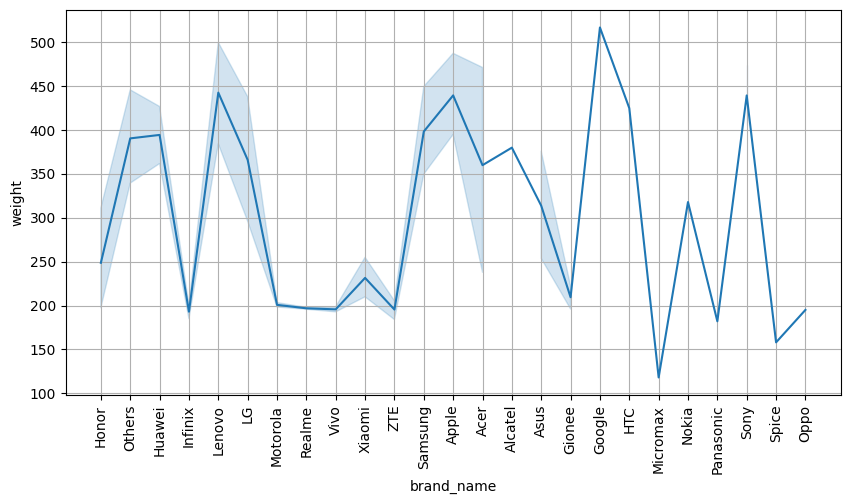

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=phone_large_battery, x='brand_name', y='weight')
plt.grid()
plt.xticks(rotation=90)
plt.show()

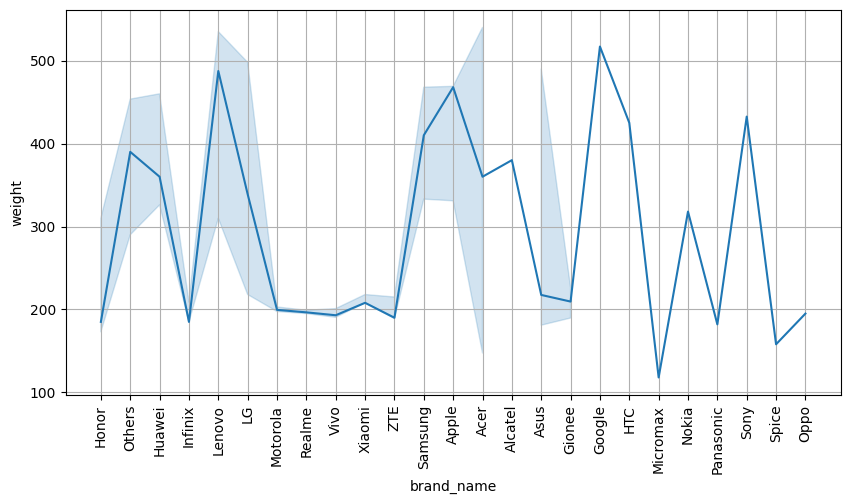

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=phone_large_battery, x='brand_name', y='weight', estimator='median')
plt.grid()
plt.xticks(rotation=90)
plt.show()

[]

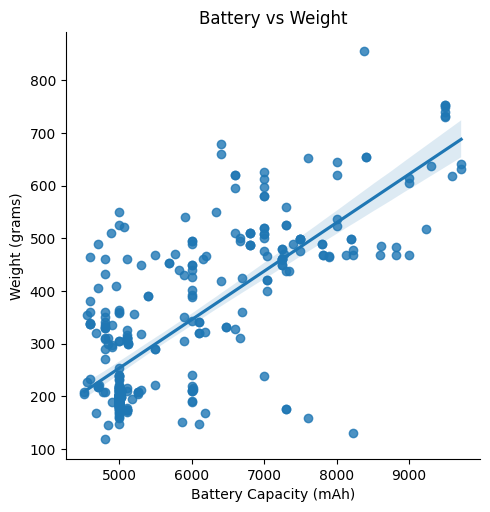

In [ ]:
# lmplot for battery vs weight of used devices for large phone battery (battery> 4500mAh)
sns.lmplot(data=phone_large_battery, x='battery', y='weight')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (grams)')
plt.title('Battery vs Weight')
plt.plot()

Observations: 


*   The dataset contains only 1 record each for the brands Alcatel, Google, HTC, Micromax, Nokia, Panasonic, Spice, and Oppo which have batteries greater than 4500 mAh.
*   The brands that have the lowest minimum values for the weight (in ascending order) are Micromax, Samsung, Xiaomi, Acer, and Spice.
*   The brands that have the highest maximum values for the weight (in ascending order) are Huawei, Apple, Lenovo, Samsung, and Others.
*   The brands that have the highest median values for weight (in ascending order) are HTC, Sony, Apple, Lenovo, and Google.
*   The inter-quartile range for weights of devices of brands RealMe, Motorola, Vivo, Infinix, and Xiaomi is smaller as compared to other brands(excluding those with only 1 record).
*   The inter-quartile range for weights of devices of brands Others, Lenovo, Samsung, LG, and Asus is highest (in ascending order) as compared to other brands.

Also: 
*   Weight and battery size seem to be positively correlated to one another.
*   Google has the highest mean weight and Micromax has the lowest mean weight.
*   Lenovo, Apple and Sony have comaparitively higher mean weights .
*   Spice, Panasonic and Infinix have lower mean weights .




**Q5 : Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [ ]:
large_screen_size = df.query('screen_size>(6*2.54)')
print(f'Number of devices with screen size larger than 6in is: {large_screen_size.shape[0]}')

Number of devices with screen size larger than 6in is: 1099


In [ ]:
large_screen_size_count = large_screen_size.groupby(['brand_name']).agg(number=('brand_name','count'))
large_screen_size_count['percent'] = large_screen_size_count['number']/large_screen_size.shape[0]*100
large_screen_size_count.sort_values(by='percent', ascending = False).head()

number    percent
brand_name                   
Huawei         149  13.557780
Samsung        119  10.828025
Others          99   9.008189
Vivo            80   7.279345
Honor           72   6.551410

In [ ]:
large_screen_size_count.sort_values(by='percent', ascending = False).tail()

number   percent
brand_name                  
Coolpad          3  0.272975
Karbonn          2  0.181984
Panasonic        2  0.181984
Spice            2  0.181984
Microsoft        1  0.090992

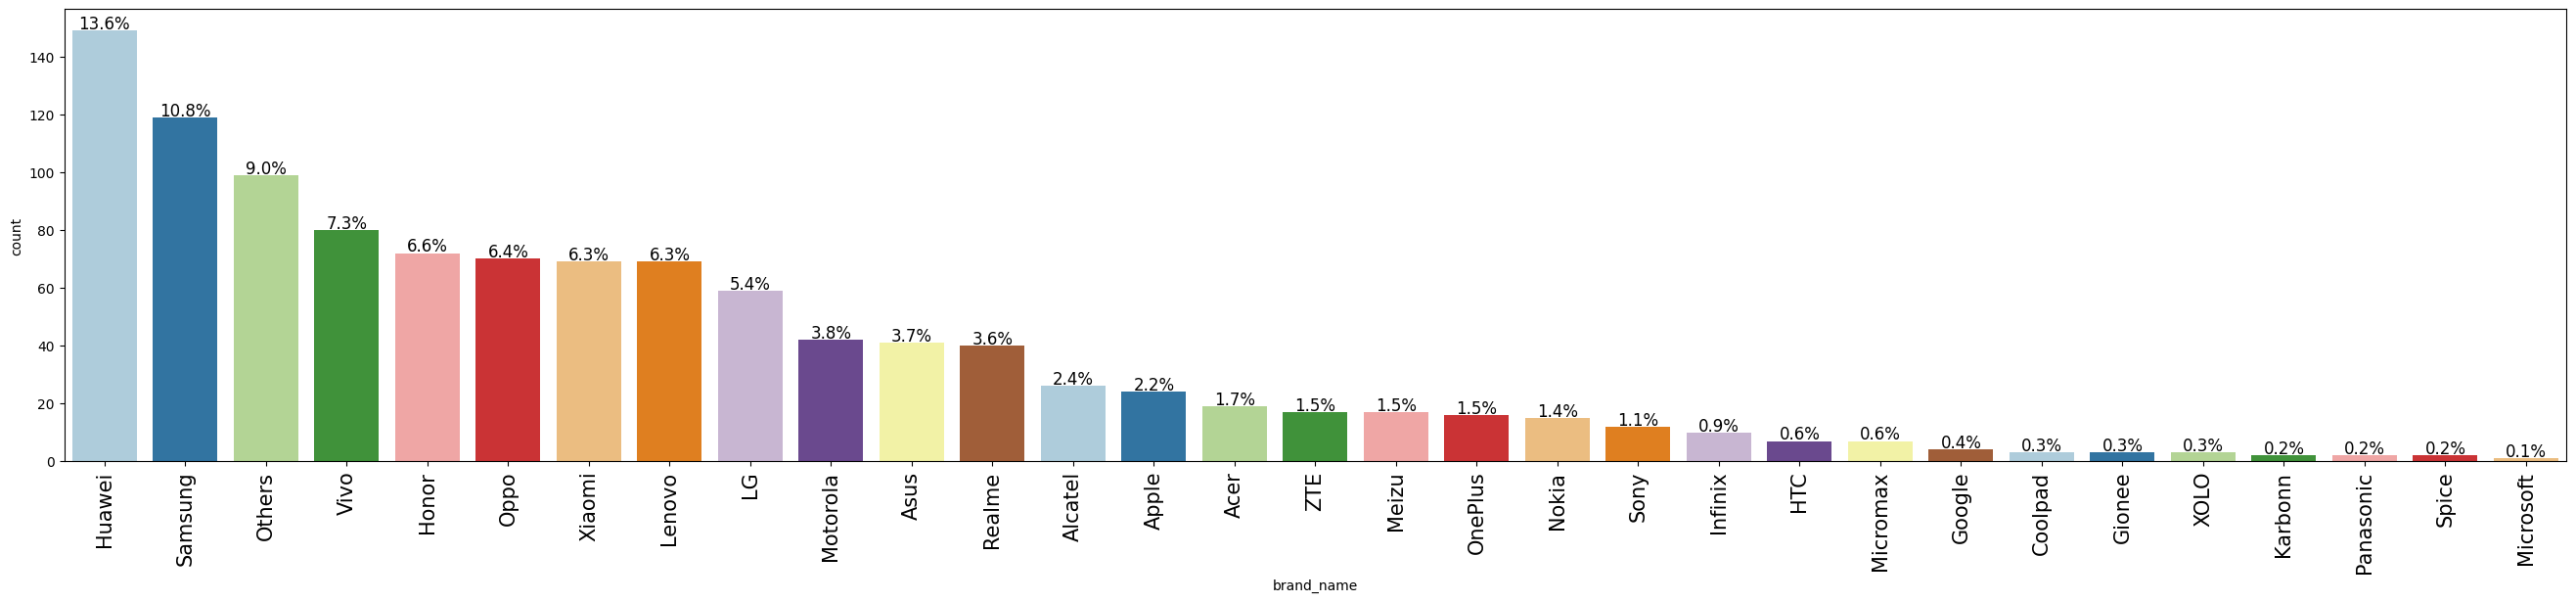

In [ ]:
labeled_barplot(data=large_screen_size, feature='brand_name', perc=True)

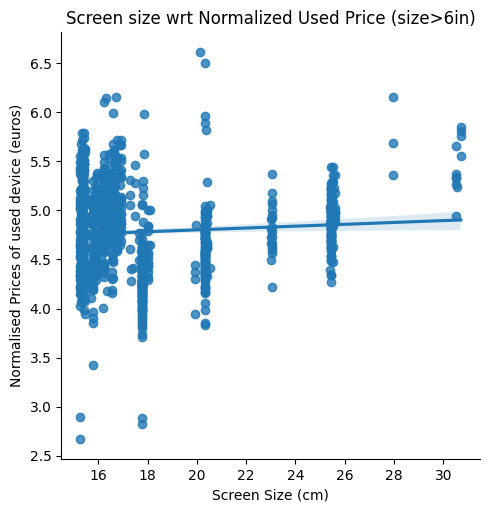

In [ ]:
# lmplot for screen_size vs normalized_use_price where screen_size > 6in:
sns.lmplot(data=large_screen_size, x='screen_size', y='normalized_used_price')
plt.xlabel('Screen Size (cm)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Screen size wrt Normalized Used Price (size>6in)')
plt.show()

Observations: 
*   1099 devices have a screen size larger than 6 in.
*   Brands with the highest percentages of large screen size: Huawei, Samsung, Others, Vivo, and Honor.
*   Brands with the lowest percentages of large screen size: Karbon, Panasonic, Spice, and Microsoft.
*   With the increase in screen size, the price of the used device also increases.






**Q6 : A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [ ]:
high_res_front_cam = df.query('selfie_camera_mp>8')
print(f'Number of devices with high front camera resolution, ie greater than 8MP is: {high_res_front_cam.shape[0]}')

Number of devices with high front camera resolution, ie greater than 8MP is: 655


In [ ]:
high_res_front_cam_count = high_res_front_cam.groupby(['brand_name']).agg(number=('brand_name','count'))
high_res_front_cam_count['percent'] = high_res_front_cam_count['number']/high_res_front_cam.shape[0]*100
high_res_front_cam_count.sort_values(by='percent', ascending = False).head()

number    percent
brand_name                   
Huawei          87  13.282443
Vivo            78  11.908397
Oppo            75  11.450382
Xiaomi          63   9.618321
Samsung         57   8.702290

In [ ]:
high_res_front_cam_count.sort_values(by='percent', ascending = False).tail()

number   percent
brand_name                  
Coolpad          3  0.458015
Micromax         2  0.305344
Panasonic        2  0.305344
BlackBerry       2  0.305344
Acer             1  0.152672

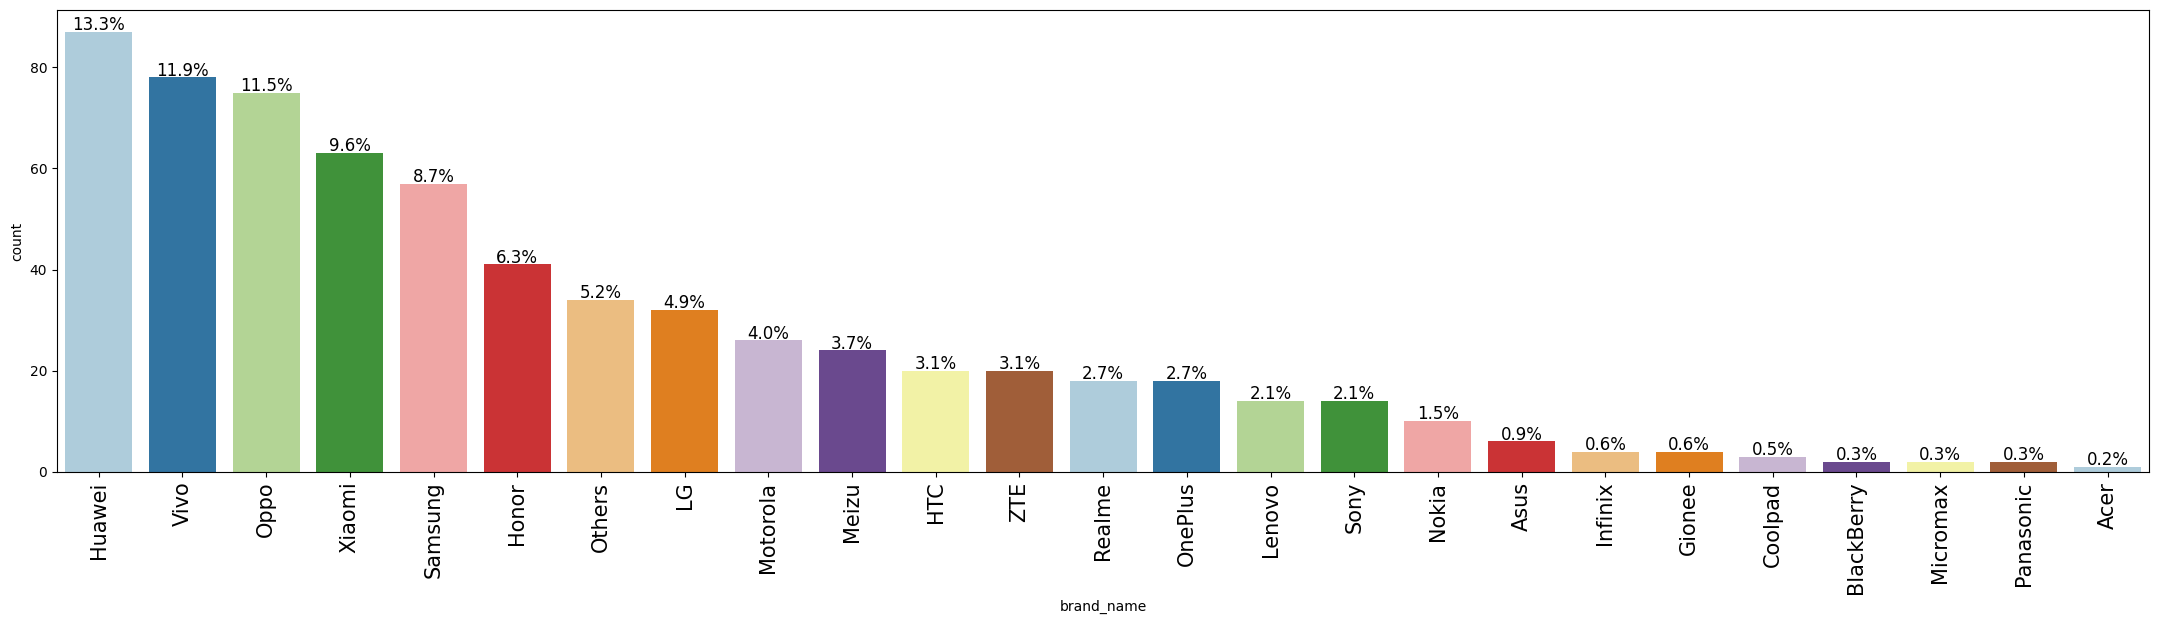

In [ ]:
labeled_barplot(data=high_res_front_cam, feature='brand_name', perc=True)

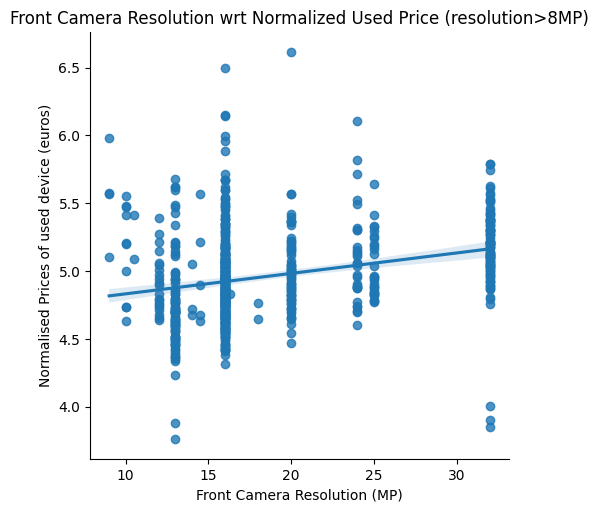

In [ ]:
# lmplot for selfie_camera_mp vs normalized_use_price where reolution of front camera > 8MP:
sns.lmplot(data=df.loc[df['selfie_camera_mp']>8], x='selfie_camera_mp', y='normalized_used_price')
plt.xlabel('Front Camera Resolution (MP)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Front Camera Resolution wrt Normalized Used Price (resolution>8MP)')
plt.show()

Observations: 
*   655 devices have a front camera resolution greater than 8 MP.
*   Brands with the highest percentages of high front camera resolution: Huawei, Vivo, Oppo, Xiaomi, and Samsung.
*   Brands with the lowest percentages of high front camera resolution: CoolPad, BlackBerry, Micromax, Panasonic, and Acer.
*   With an increase in front camera resolution, normalized prices of the used devices increases.




Analyzing Rear Camera Resolution 

In [ ]:
#Taking Main camera threshold as 16 MP:
high_res_main_cam = df.query('main_camera_mp>16')
print(f'Number of devices with high rear camera resolution, ie, greater than 16MP is: {high_res_main_cam.shape[0]}')

Number of devices with high rear camera resolution, ie, greater than 16MP is: 94


In [ ]:
high_res_main_cam_count = high_res_main_cam.groupby(['brand_name']).agg(number=('brand_name','count'))
high_res_main_cam_count['percent'] = high_res_main_cam_count['number']/high_res_front_cam.shape[0]*100
high_res_main_cam_count.sort_values(by='percent', ascending = False).head()

number   percent
brand_name                  
Sony            37  5.648855
Motorola        11  1.679389
Others           9  1.374046
HTC              6  0.916031
ZTE              5  0.763359

In [ ]:
high_res_main_cam_count.sort_values(by='percent', ascending = False).tail()

number   percent
brand_name                  
Honor            1  0.152672
Gionee           1  0.152672
Panasonic        1  0.152672
Xiaomi           1  0.152672
Acer             1  0.152672

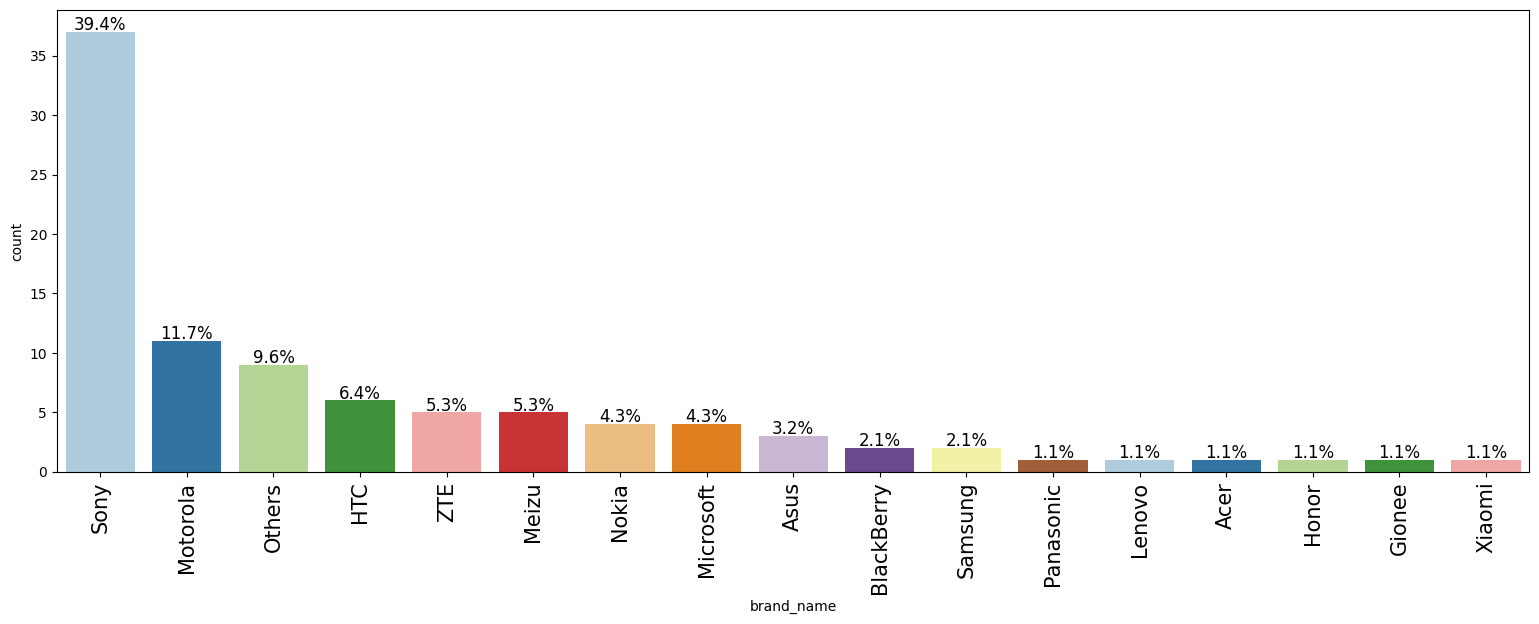

In [ ]:
labeled_barplot(data=high_res_main_cam, feature='brand_name', perc=True)

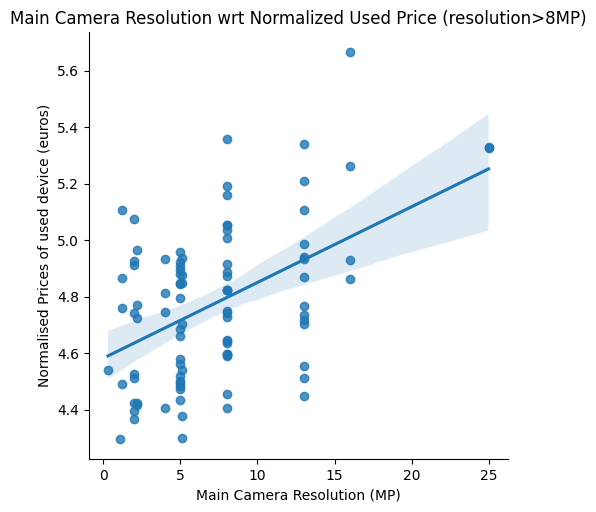

In [ ]:
# lmplot for main_camera_mp vs normalized_use_price where main camera resolution > 16MP :
sns.lmplot(data=df.loc[df['main_camera_mp']>16], x='selfie_camera_mp', y='normalized_used_price')
plt.xlabel('Main Camera Resolution (MP)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Main Camera Resolution wrt Normalized Used Price (resolution>8MP)')
plt.show()

Observations: 
*   94 devices have a main camera resolution greater than 16 MP.
*   Brands with the highest percentages of high main camera resolution: Sony, Motorola, Others, HTC, and ZTE.
*   Brands with the lowest percentages of high main camera resolution: Honor, Gionee, Panasonic, Xiaomi, and Acer.
*   With an increase in main camera resolution, the price of the used devices also increases.




**Q7 : Which attributes are highly correlated with the normalized price of a used device?**

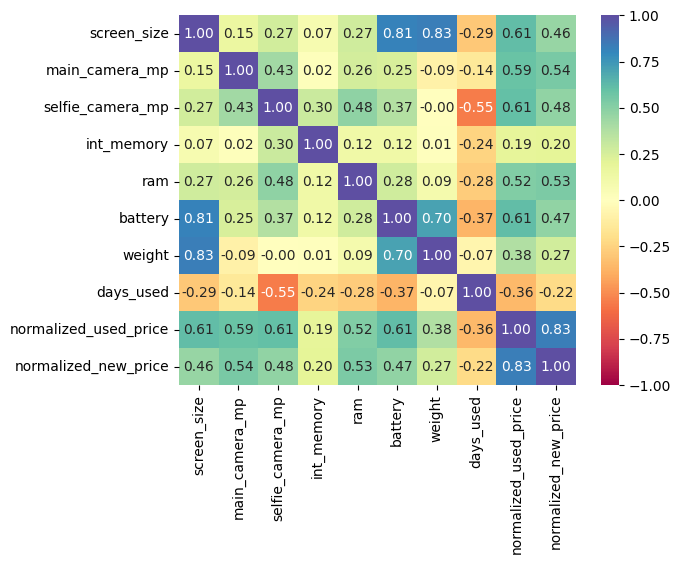

In [ ]:
sns.heatmap(df[column_list].corr(), vmin=-1, vmax=1, annot=True, fmt='0.2f', cmap='Spectral')
plt.show()

Observations: 

|Variable | Related Variables   | Correlation Value |
|----------| -------------------- | ------------------------------------ |
| normalized_used_price  | normalized_new_price | 0.83  |
| normalized_used_price | screen_size | 0.61  |
| normalized_used_price | selfie_camera_mp | 0.61 |
| normalized_used_price  | battery | 0.61  |
| normalized_used_price | main_camera_mp | 0.59  |
| normalized_used_price | ram | 0.52 |
| normalized_used_price  | weight | 0.38  |
| normalized_used_price | int_memory | 0.19  |
| normalized_used_price | days_used | -0.36 |

*   Variable 'normalized_used_price' is most positively correlated with 'normalized_new_price' then followed by 'screen_size', 'selfie_camera_mp' and 'battery'.
*   Variable 'normalized_used_price' is negatively correlated with 'days_used'.






## Data Preprocessing

In [ ]:
# Creating a copy of the dataset:
df1 = df.copy()

In [ ]:
# Checking for missing values:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Imputing the missing values with median values of the column after grouping the dataset by 'release_year' and 'brand_name'.
cols_to_impute = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']
for col in cols_to_impute:
    df1[col] = df1[col].fillna(value=df1.groupby(['release_year','brand_name'])[col].transform("median"))

In [ ]:
# Checking for missing values:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Imputing the missing values with median values of the column after grouping the dataset by 'brand_name'.
# The missing values in the columns 'int_memory' and 'ram' have been filled in the last step.
cols_to_impute = ['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight']
for col in cols_to_impute:
    df1[col] = df1[col].fillna(value=df1.groupby(['brand_name'])[col].transform("median"))

In [ ]:
# Checking for missing values:
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
# Imputing the missing values with median values of the column.
# The missing values in the columns 'selfie_camera_mp', 'battery' and 'weight' have been filled in the last step.
# The only remaining column to have missing values is 'main_camera_mp'.
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(df1['main_camera_mp'].median())

In [ ]:
# Checking for missing values:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

## Exploratory Data Analysis
  To check if performing imputations to fill the missing values in different columns has resulted in any major changes to the dataset.

In [ ]:
df1.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3454.0     9.617597     4.749438     0.080000   
selfie_camera_mp       3454.0     6.555067     6.968440     0.000000   
int_memory             3454.0    54.528474    84.934991     0.010000   
ram                    3454.0     4.032620     1.368598     0.020000   
battery                3454.0  3132.577446  1298.884193   500.000000   
weight                 3454.0   182.636856    88.360445    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

Observations:

*   The average values in columns where imputation has been performed seem to have been very slightly changed.
*   The median and different percentile values in columns where imputation has been performed do not seem to have any changes.



### Univariate Analysis

**`normalized_used_price`**

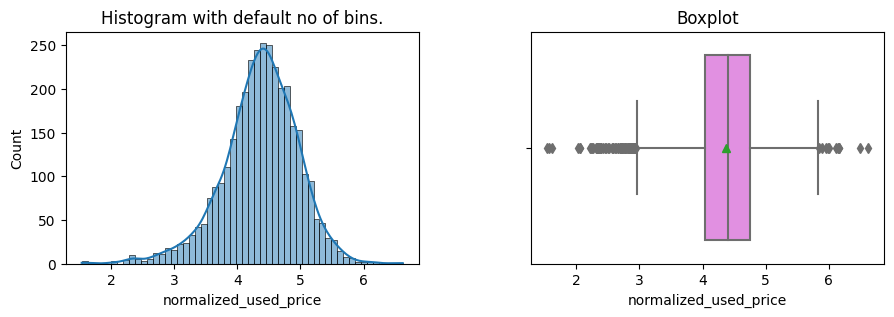

In [ ]:
creating_hist_box(df1, 'normalized_used_price')

Observations:
*   There is no change in any of the column (normalized_used_price) summary values such as mean, median, min, max, and the different percentile values.  



**`normalized_new_price`**

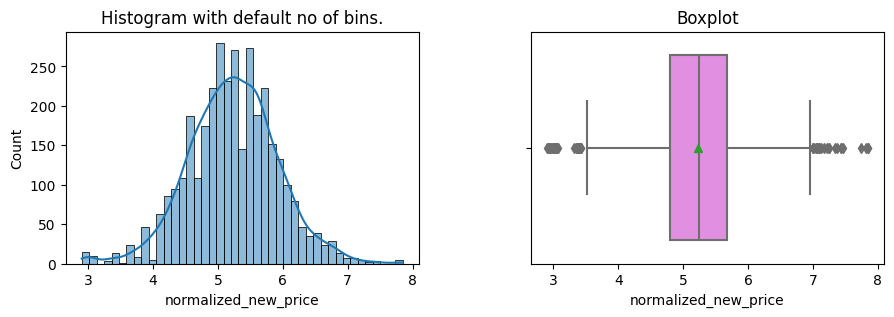

In [ ]:
creating_hist_box(df1, 'normalized_new_price')

Observations:
*   There is no change in any of the column (normalized_new_price) summary values such as mean, median, min, max, and the different percentile values.  

**`screen_size`**

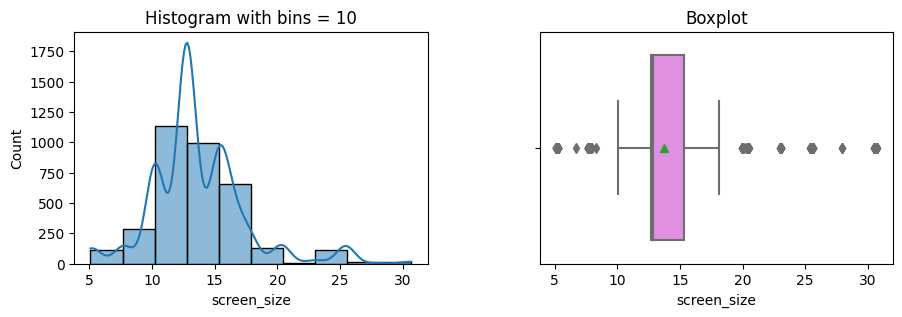

In [ ]:
creating_hist_box(df1, 'screen_size', bins=10)

Observations:
*   There is no change in any of the column(screen_size) summary values such as mean, median, min, max, and the different percentile values.  

**`main_camera_mp`**

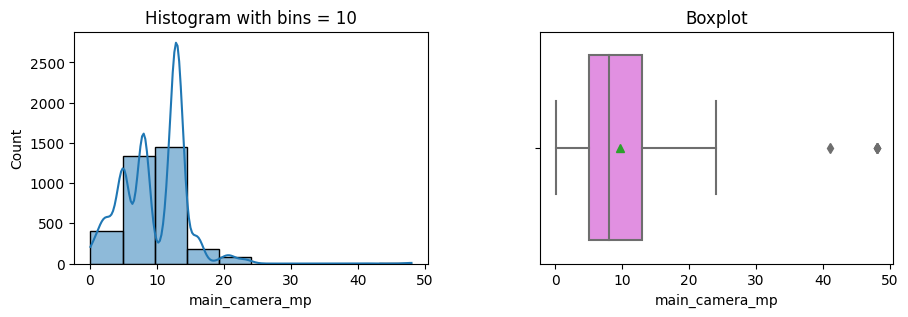

In [ ]:
creating_hist_box(df1, 'main_camera_mp', bins = 10)

Observations: 
*   There is a small change in the following column's (main_camera_mp) summary values: 

|Summary Parameter | Value before imputation   | Value after imputation |
|----------| -------------------- | ------------------------------------ |
|  mean | 9.460208 | 9.617597  |
| std dev | 4.815461 | 4.749438  |

*   The other summary values remain the same.





**`selfie_camera_mp`**

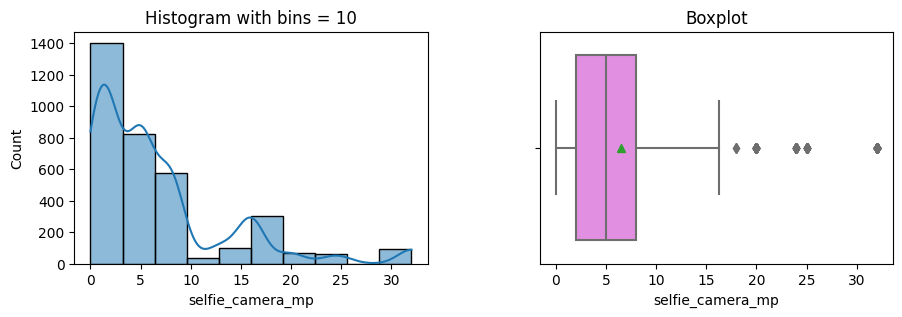

In [ ]:
creating_hist_box(df1,'selfie_camera_mp', bins = 10)

Observations: 
*   There is a small change in the following column's (selfie_camera_mp) summary values: 

|Summary Parameter | Value before imputation   | Value after imputation |
|----------| -------------------- | ------------------------------------ |
|  mean | 6.554229 | 6.555067  |
| std dev | 6.970372 | 6.968440  |

*   The other summary values remain the same.


**`int_memory`**

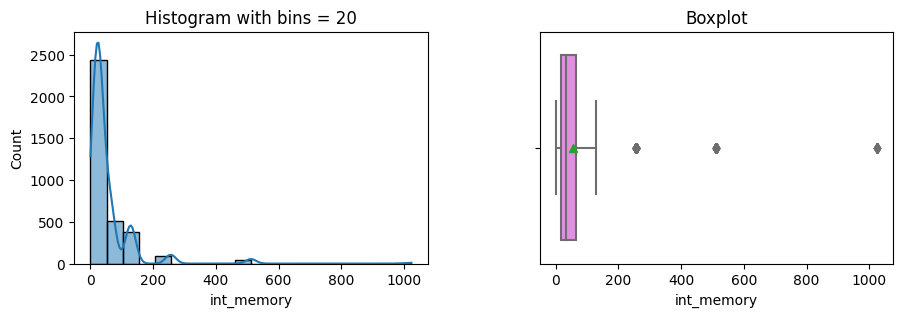

In [ ]:
creating_hist_box(df1, 'int_memory', bins = 20)

Observations: 
*   There is a small change in the following column's (selfie_camera_mp) summary values: 

|Summary Parameter | Value before imputation   | Value after imputation |
|----------| -------------------- | ------------------------------------ |
|  mean | 54.573099 | 54.528474  |
| std dev | 84.972371 | 84.934991  |

*   The other summary values remain the same.

**`ram`**

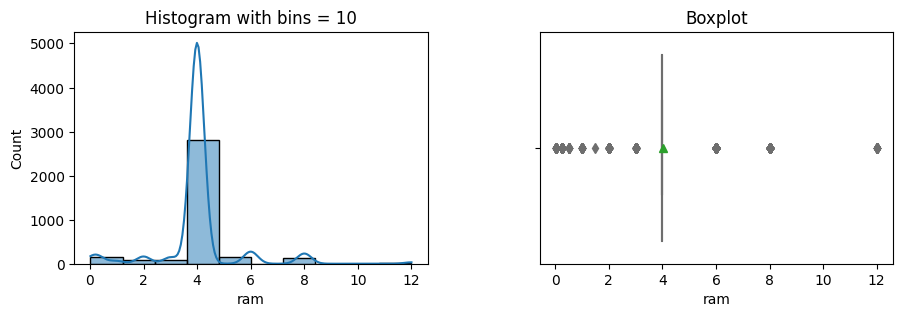

In [ ]:
creating_hist_box(df1,'ram', bins=10)

Observations: 
*   There is a small change in the following column's (selfie_camera_mp) summary values: 

|Summary Parameter | Value before imputation   | Value after imputation |
|----------| -------------------- | ------------------------------------ |
|  mean | 4.036122 | 4.032620  |
| std dev | 1.365105 |  1.368598 |

*   The other summary values remain the same.

**`weight`**

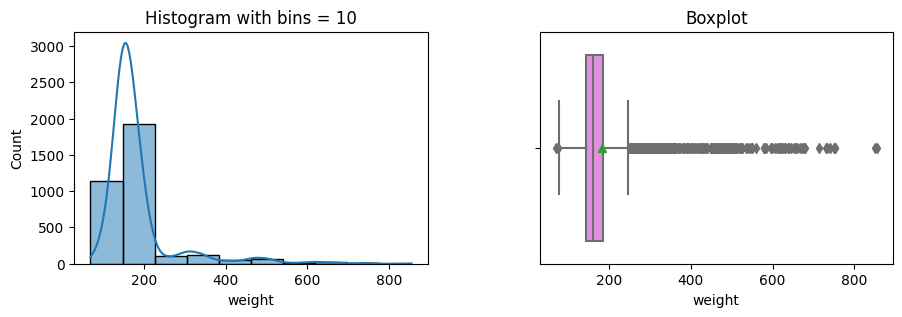

In [ ]:
creating_hist_box(df1, 'weight', bins=10)

Observations: 
*   There is a small change in the following column's (selfie_camera_mp) summary values: 

|Summary Parameter | Value before imputation   | Value after imputation |
|----------| -------------------- | ------------------------------------ |
|  mean | 182.751871 | 182.636856  |
| std dev | 88.413228 |  88.360445 |

*   The other summary values remain the same.

**`battery`**

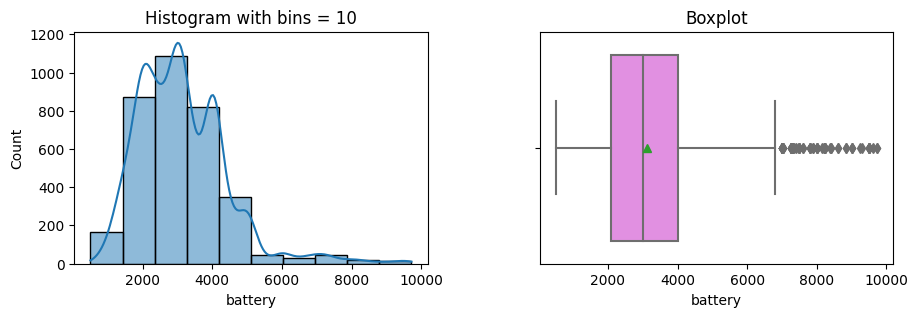

In [ ]:
creating_hist_box(df1, 'battery', bins= 10)

Observations: 
*   There is a small change in the following column's (selfie_camera_mp) summary values: 

|Summary Parameter | Value before imputation   | Value after imputation |
|----------| -------------------- | ------------------------------------ |
|  mean | 3133.402697 | 3132.577446  |
| std dev | 1299.682844 |  1298.884193 |

*   The other summary values remain the same.

**`days_used`**

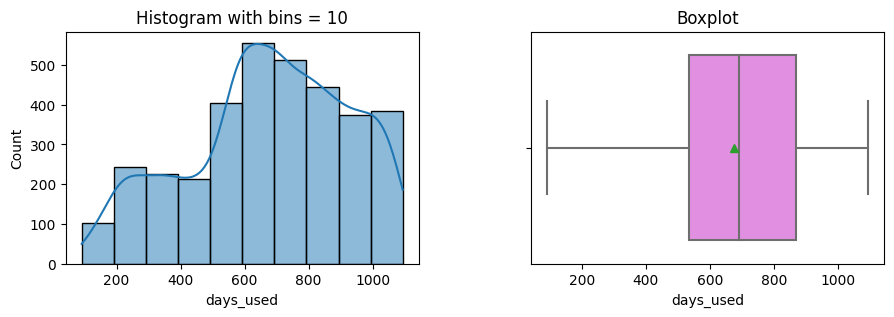

In [ ]:
creating_hist_box(df1, 'days_used', bins=10)

Observations:
*   There is no change in any of the column (normalized_used_price) summary values such as mean, median, min, max, and the different percentile values. 

**`brand_name`**

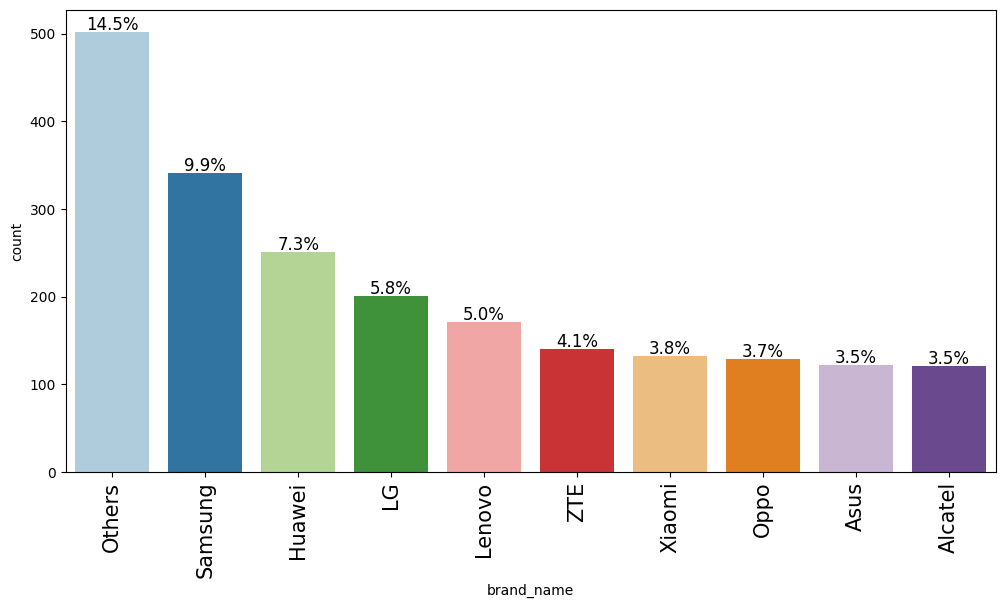

In [ ]:
labeled_barplot(df1, "brand_name", perc=True, n=10)

Observations: 

*   There is no change in the countplot showing the percentages of different brands present in the dataset, after imputation.

**`os`**

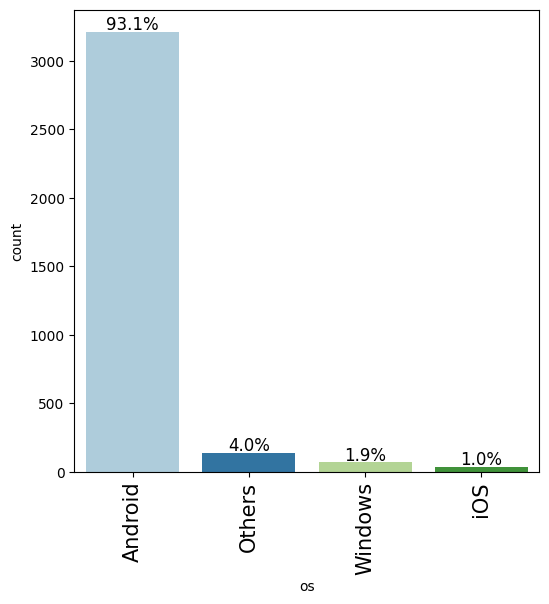

In [ ]:
labeled_barplot(df1, "os", perc=True)

Observations: 

*   There is no change in the countplot showing the percentages of different operating systems present in the dataset, after imputation.

**`4g`**

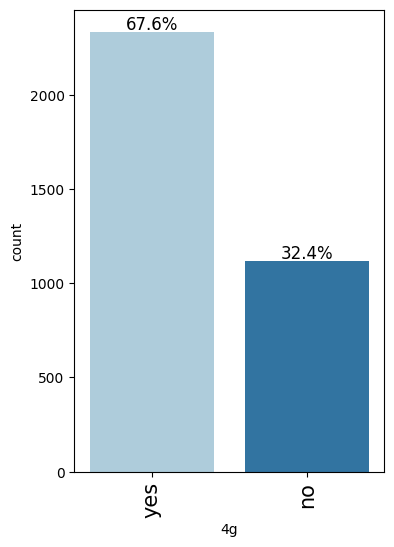

In [ ]:
labeled_barplot(df1, "4g", perc=True)

Observations: 

*   There is no change in the countplot showing the percentages of used devices that support/do not support the 4g network present in the dataset, after imputation.

**`5g`**

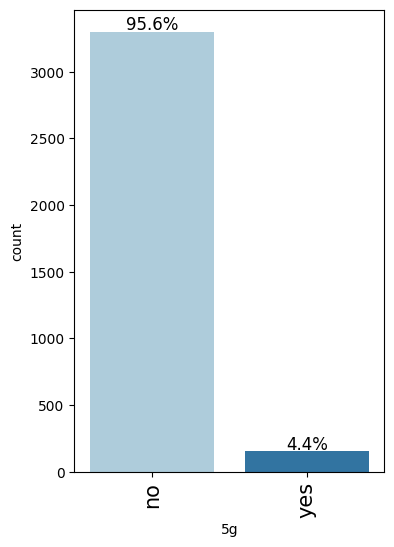

In [ ]:
labeled_barplot(df1, "5g", perc=True)

Observations: 

*   There is no change in the countplot showing the percentages of used devices that support/do not support the 5g network present in the dataset, after imputation.

**`release_year`**

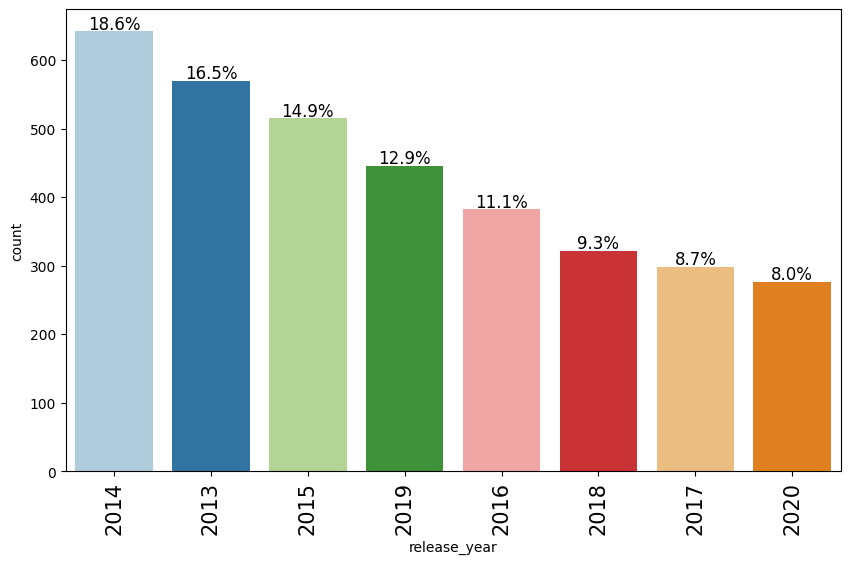

In [ ]:
labeled_barplot(df1, "release_year", perc=True)

Observations: 

*   There is no change in the countplot showing the percentages of used devices vs release_year in the dataset, after imputation.

### Bivariate Analysis

**Correlation Check**

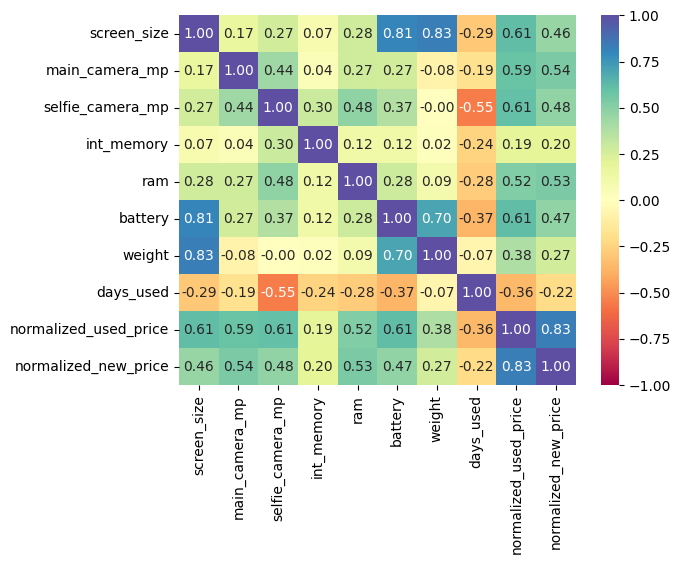

In [ ]:
# Checking if the correlation values between different columns have been affected after filling missing values with median values.
sns.heatmap(df1[column_list].corr(), vmin=-1, vmax=1, fmt='0.2f', annot=True, cmap='Spectral')
plt.show()

Observations: 

*   There are minor differences in the correlation values after performing imputations. 
*   Following are the correlation values before and after imputation: 

|Variables | Corr. Value before imputation   | Corr. Value after imputation |
|----------| -------------------- | ------------------------------------ |
| main_camera_mp & screen_size  | 0.15 | 0.17  |
| selfie_camera_mp & main_camera_mp | 0.43 | 0.44  |
| int_memory & main_camera_mp | 0.02 | 0.04 |
| ram & screen_size  | 0.27 | 0.28  |
| ram & main_camera_mp | 0.26 | 0.27  |
| battery & main_camera_mp | 0.25 | 0.27 |
| weight & main_camera_mp  | -0.09 | -0.08  |
| weight & int_memory | 0.01 | 0.02  |
| days_used & main_camera_mp | -0.14 | -0.19 |

*   There are no changes in the correlation values for the column normalized_used_price with other variables.
*   There are no changes in the correlation values for the column normalized_new_price with other variables.







**normalized_used_price vs release year**

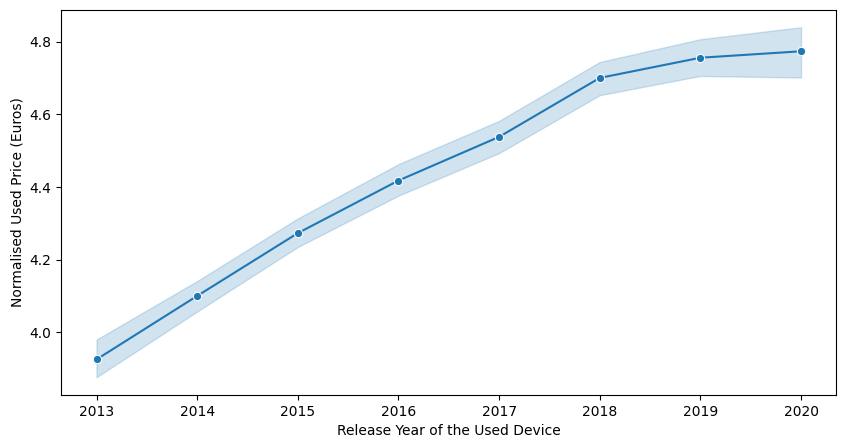

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(data= df1, x='release_year', y='normalized_used_price', marker='o', markersize=6) 
plt.xlabel('Release Year of the Used Device')
plt.ylabel('Normalised Used Price (Euros)')
plt.show()

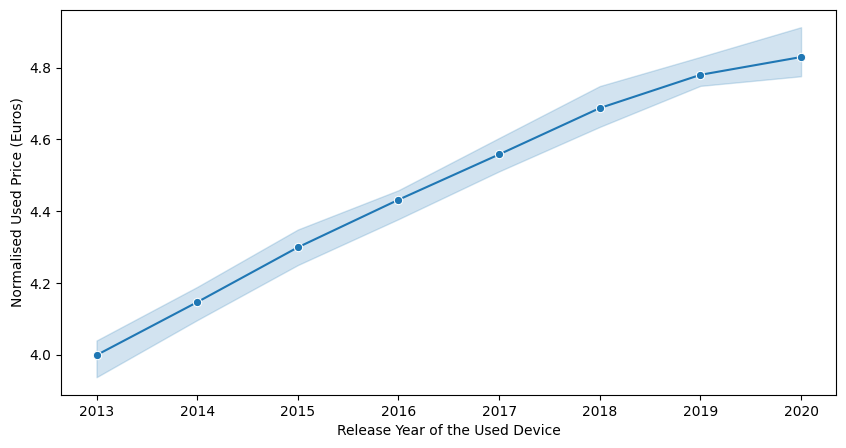

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(data= df1, x='release_year', y='normalized_used_price', marker='o', markersize=6, estimator='median') 
plt.xlabel('Release Year of the Used Device')
plt.ylabel('Normalised Used Price (Euros)')
plt.show()

Observation: 

*  Both the plots (first with missing values, and the other with no missing values) seem to have the same trend followed by the normalized prices of used devices over the years from 2013 to 2020. 




**normalized_used_price vs 4g and 5g**






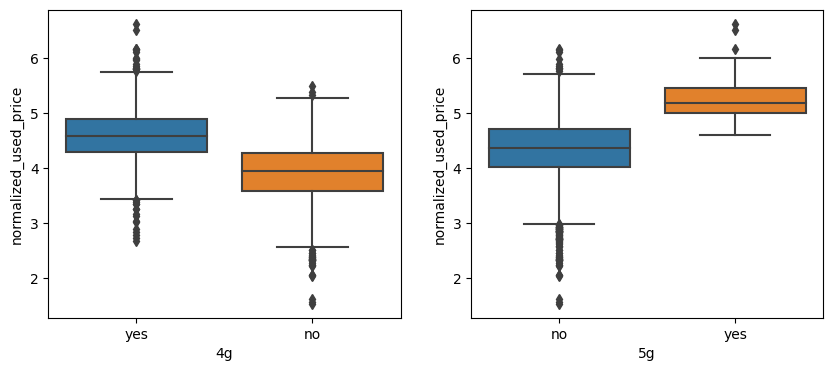

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df1, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df1, x="5g", y="normalized_used_price")

plt.show()

In [ ]:
df1.groupby(['4g'])['normalized_used_price'].describe()

count      mean       std       min       25%       50%       75%  \
4g                                                                        
no   1119.0  3.896332  0.566646  1.536867  3.582268  3.949897  4.263876   
yes  2335.0  4.589173  0.451344  2.667228  4.297081  4.573267  4.881020   

          max  
4g             
no   5.494953  
yes  6.619433

In [ ]:
df1.groupby(['5g'])['normalized_used_price'].describe()

count      mean       std       min       25%       50%       75%  \
5g                                                                        
no   3302.0  4.325089  0.567316  1.536867  4.014986  4.372292  4.705264   
yes   152.0  5.225482  0.338917  4.602667  4.993617  5.178265  5.448899   

          max  
5g             
no   6.158969  
yes  6.619433

Observations:

*   The plot suggests no changes have occurred due to imputation.

**screen_size vs normalized_used_price**

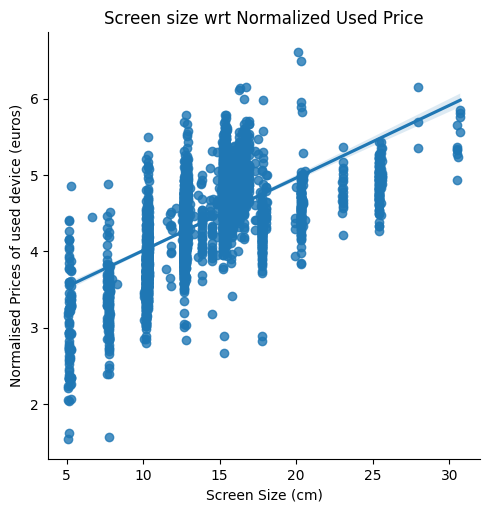

In [ ]:
# lmplot for screen_size vs normalized_use_price:
sns.lmplot(data=df1, x='screen_size', y='normalized_used_price')
plt.xlabel('Screen Size (cm)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Screen size wrt Normalized Used Price')
plt.show()

Observations:

*   The plot suggests no changes have occurred due to imputation.

**main_camera_mp vs normalized_used_price**

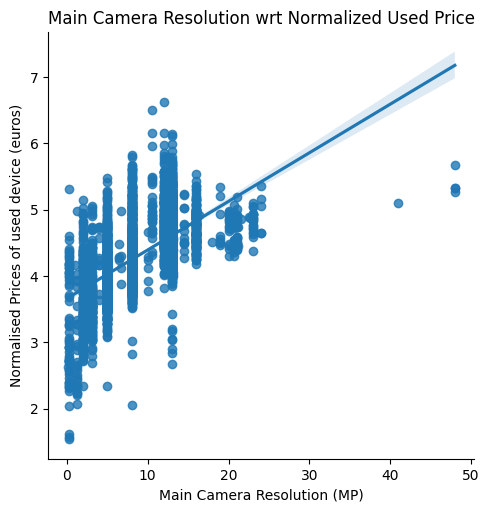

In [ ]:
# lmplot for main_camera_mp vs normalized_use_price:
sns.lmplot(data=df1, x='main_camera_mp', y='normalized_used_price')
plt.xlabel('Main Camera Resolution (MP)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Main Camera Resolution wrt Normalized Used Price')
plt.show()

Observations:

*   The plot suggests no major changes have occurred due to imputation.

**selfie_camera_mp vs normalized_used_price**

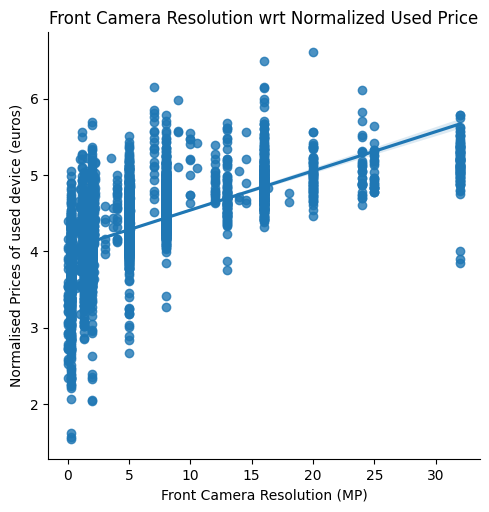

In [ ]:
# lmplot for selfie_camera_mp vs normalized_used_price:
sns.lmplot(data=df1, x='selfie_camera_mp', y='normalized_used_price')
plt.xlabel('Front Camera Resolution (MP)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Front Camera Resolution wrt Normalized Used Price')
plt.show()

Observations:

*   The plot suggests no major changes have occurred due to imputation.

**weight vs normalized_used_price**

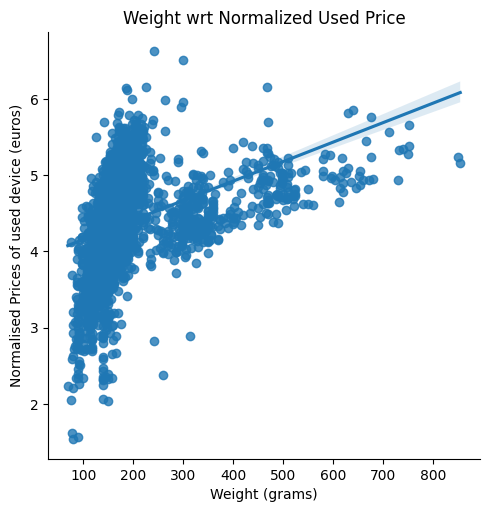

In [ ]:
# lmplot for weight vs normalized_used_price:
sns.lmplot(data=df1, x='weight', y='normalized_used_price')
plt.xlabel('Weight (grams)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Weight wrt Normalized Used Price')
plt.show()

Observations:

*   The plot suggests no major changes have occurred due to imputation.

**int_memory vs normalized_used_price**

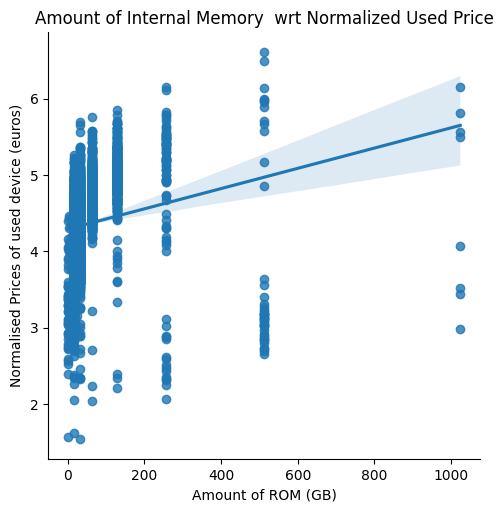

In [ ]:
# lmplot for int_memory vs normalized_used_price:
sns.lmplot(data=df1, x='int_memory', y='normalized_used_price')
plt.xlabel('Amount of ROM (GB)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Amount of Internal Memory  wrt Normalized Used Price')
plt.show()

Observations:

*   The plot suggests no major changes have occurred due to imputation.

**ram vs normalized_used_price**

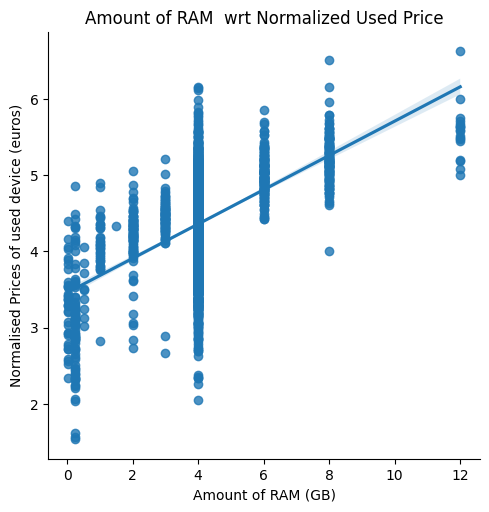

In [ ]:
# lmplot for ram vs normalized_used_price:
sns.lmplot(data=df1, x='ram', y='normalized_used_price')
plt.xlabel('Amount of RAM (GB)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Amount of RAM  wrt Normalized Used Price')
plt.show()

Observations:

*   The plot suggests no major changes have occurred due to imputation.

**battery vs normalized_used_price**

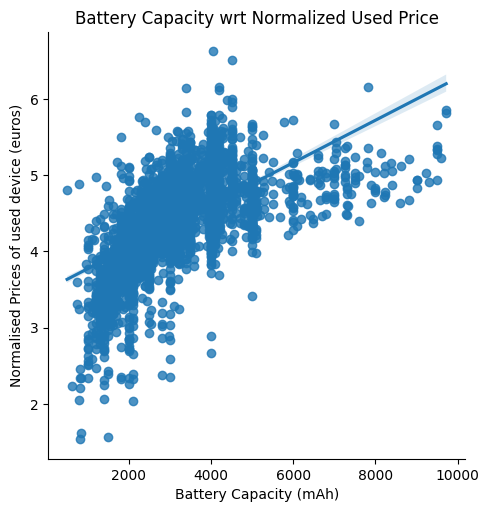

In [ ]:
# lmplot for battery vs normalized_used_price:
sns.lmplot(data=df1, x='battery', y='normalized_used_price')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Battery Capacity wrt Normalized Used Price')
plt.show()

Observations:

*   The plot suggests no major changes have occurred due to imputation.

**days_used vs_normalized_used_price**

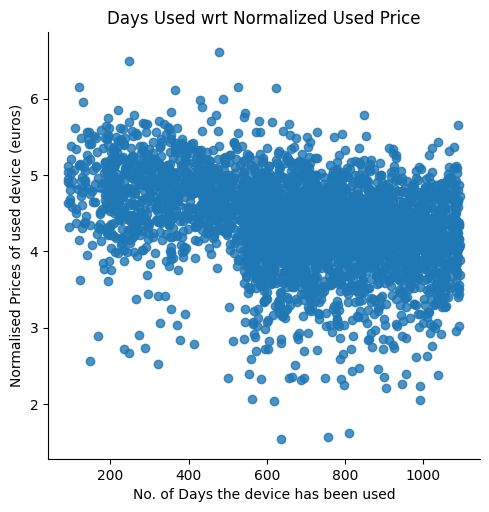

In [ ]:
# lmplot for days_used vs normalized_used_price:
sns.lmplot(data=df1, x='days_used', y='normalized_used_price')
plt.xlabel('No. of Days the device has been used')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Days Used wrt Normalized Used Price')
plt.show()

Observations:

*   The plot suggests no major changes have occurred due to imputation.

Overall Observation on EDA after imputations: 

*   No significant changes have been introduced in the dataset by imputation.




## Questions: 
   (Re-visiting the question section to see if any changes have been introduced because of imputation)

**Q1 : What does the distribution of normalized used device prices look like?**

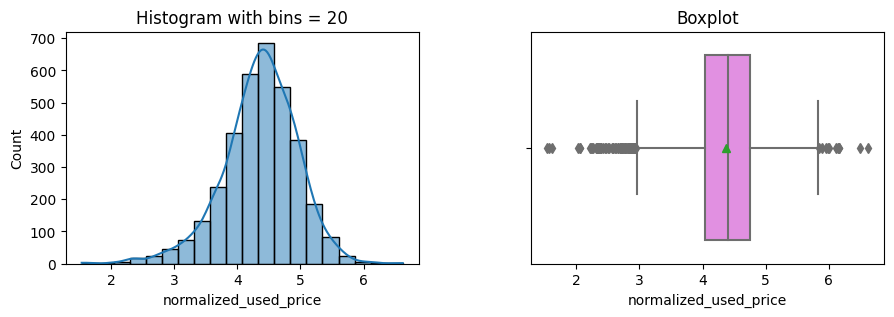

In [ ]:
creating_hist_box(df1, 'normalized_used_price', bins=20)

In [ ]:
df1['normalized_used_price'].describe()

count    3454.000000
mean        4.364712
std         0.588914
min         1.536867
25%         4.033931
50%         4.405133
75%         4.755700
max         6.619433
Name: normalized_used_price, dtype: float64

Observations: 

*   The summary values for the column normalized_used_price do not seem to have undergone any changes due to imputations.
*   The plots for the column before and after imputation remains the same.



**Q2 : What percentage of the used device market is dominated by Android devices?**

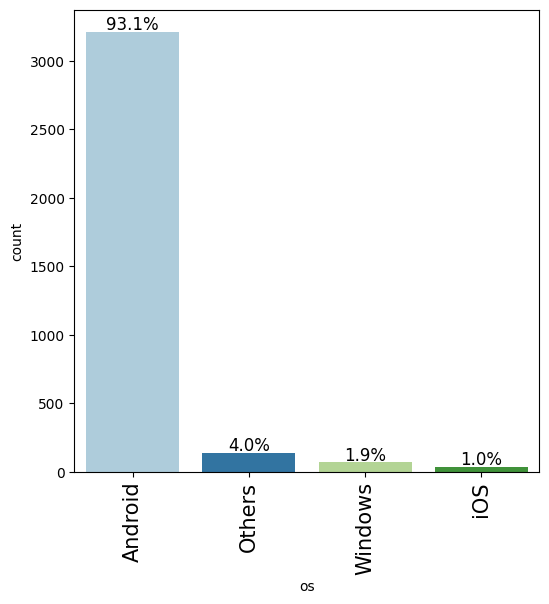

In [ ]:
labeled_barplot(df1, "os", perc=True)

Observations: 

*   The plots suggest that the count and percentages of devices concerning different operating systems did not get affected by imputations.

**Q3 : The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

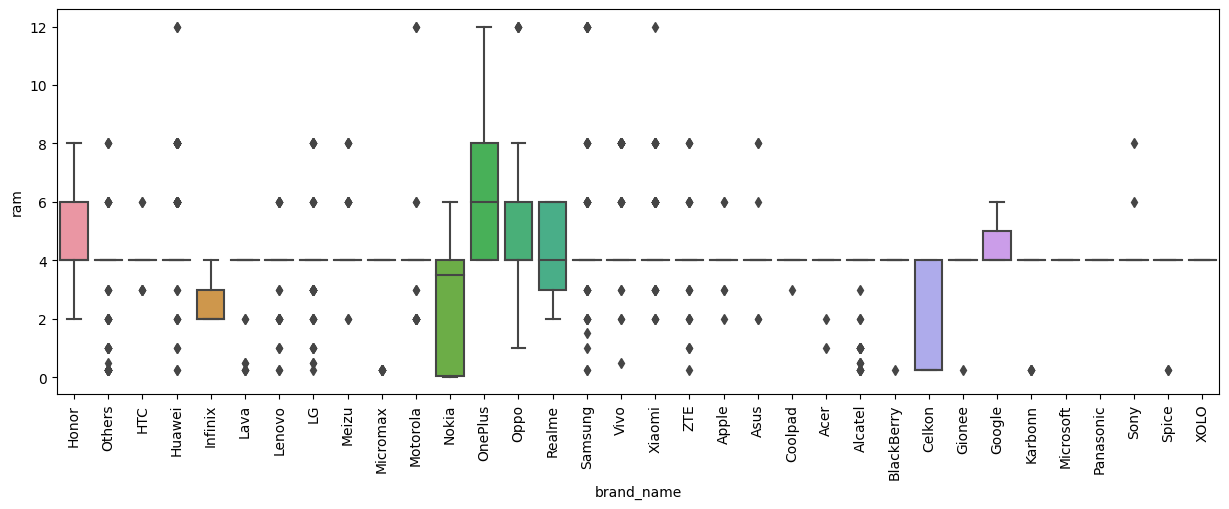

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df1, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [ ]:
(df.loc[df['brand_name']=='Nokia',['ram']]).describe().T

count      mean       std   min   25%  50%  75%  max
ram  102.0  2.420294  1.889325  0.02  0.03  4.0  4.0  6.0

In [ ]:
(df1.loc[df1['brand_name']=='Nokia',['ram']]).describe().T

count     mean       std   min   25%  50%  75%  max
ram  106.0  2.36717  1.882383  0.02  0.03  3.5  4.0  6.0

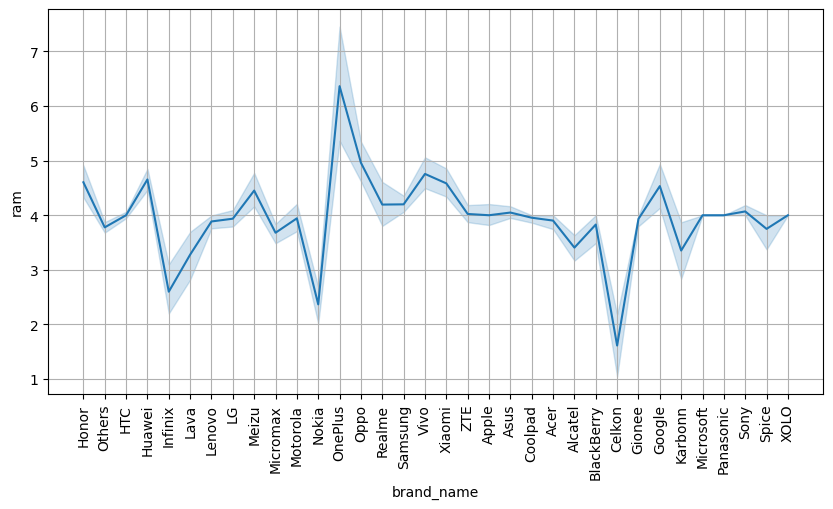

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df1, x='brand_name', y='ram')
plt.grid()
plt.xticks(rotation=90)
plt.show()

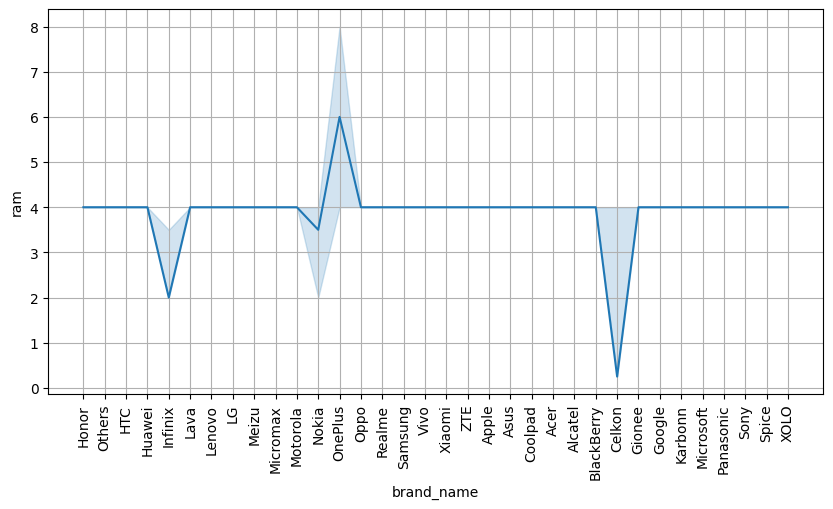

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df1, x='brand_name', y='ram', estimator='median')
plt.grid()
plt.xticks(rotation=90)
plt.show()

Observations: 

*   The average amount of ram present in Nokia devices changed from 2.42 to 2.37 after imputations.



**Q4 : A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [ ]:
phone_large_battery_1 = df1.loc[df1['battery']>4500]
phone_large_battery_1.shape

(341, 15)

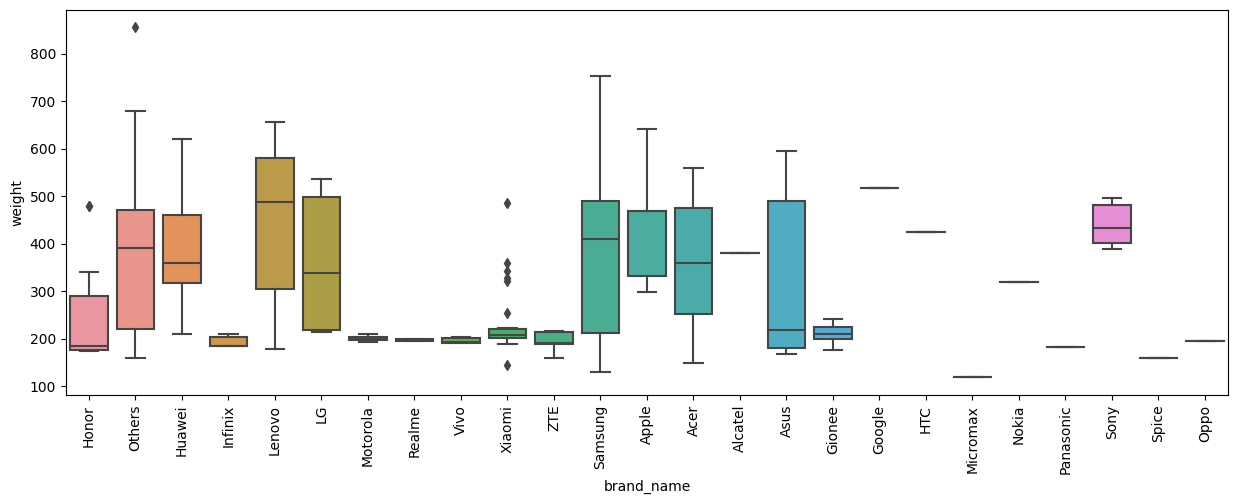

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=phone_large_battery_1,x='brand_name', y='weight') ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

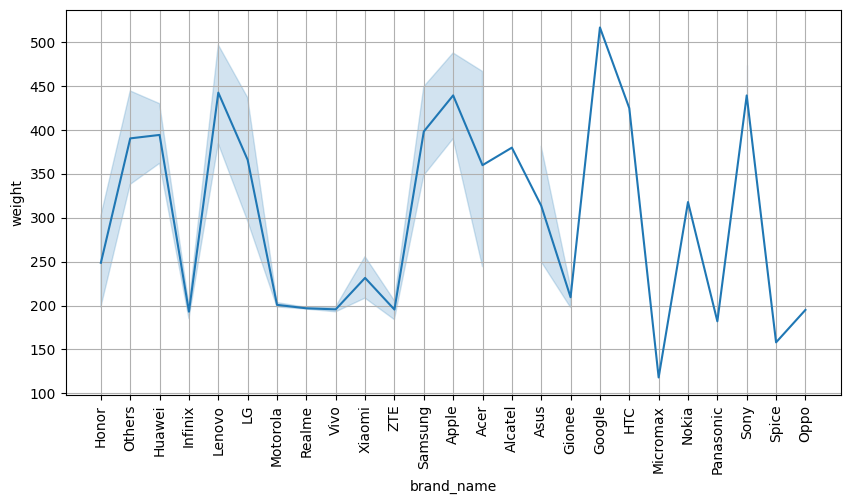

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=phone_large_battery_1, x='brand_name', y='weight')
plt.grid()
plt.xticks(rotation=90)
plt.show()

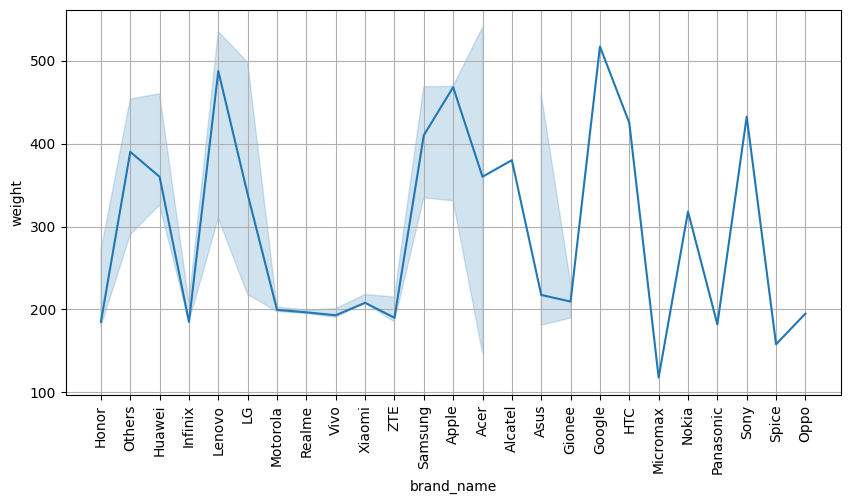

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=phone_large_battery_1, x='brand_name', y='weight', estimator='median')
plt.grid()
plt.xticks(rotation=90)
plt.show()

Observations: 

*   The plots suggest that there are no major changes after imputations.

**Q5 : Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [ ]:
large_screen_size_1 = df1.query('screen_size>(6*2.54)')
print(f'Number of devices with screen size larger than 6in is: {large_screen_size_1.shape[0]}')

Number of devices with screen size larger than 6in is: 1099


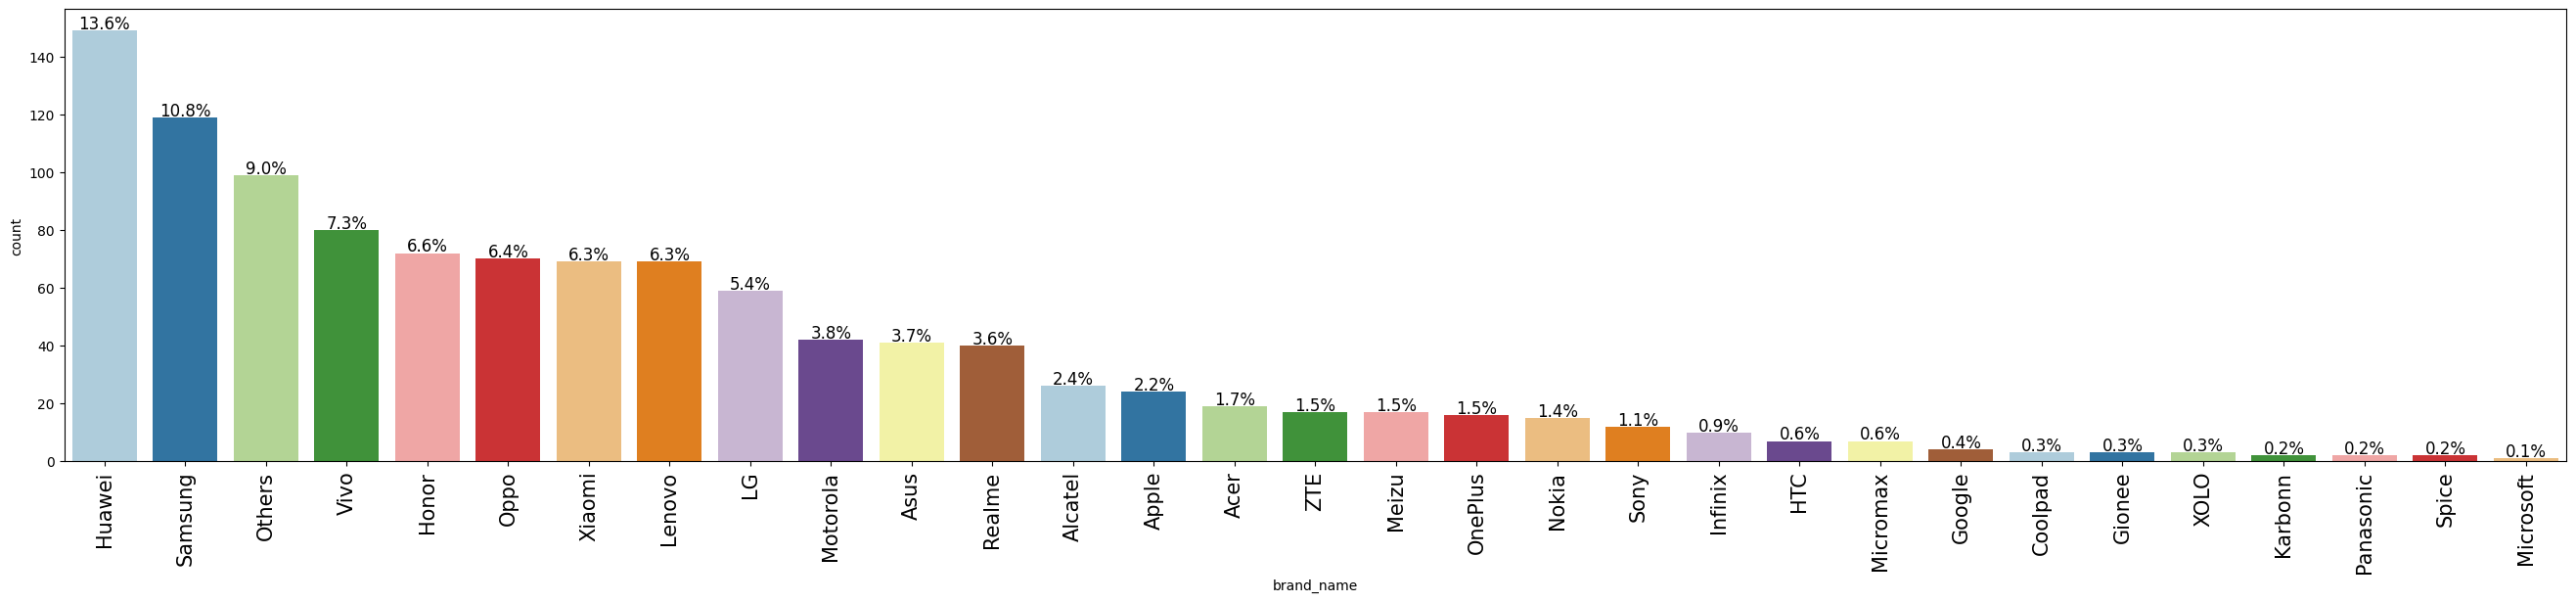

In [ ]:
labeled_barplot(data=large_screen_size_1, feature='brand_name', perc=True)

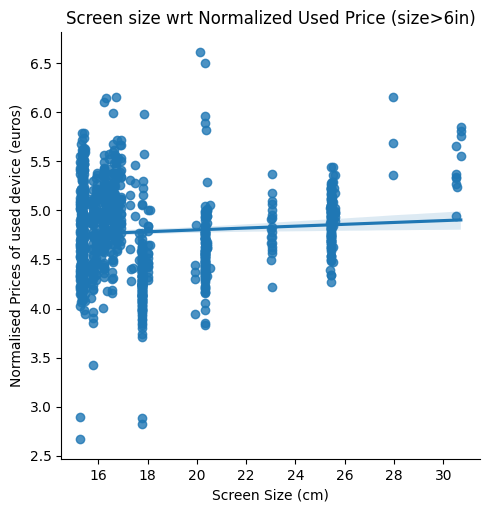

In [ ]:
# lmplot for screen_size vs normalized_use_price where screen_size > 6in:
sns.lmplot(data=large_screen_size_1, x='screen_size', y='normalized_used_price')
plt.xlabel('Screen Size (cm)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.title('Screen size wrt Normalized Used Price (size>6in)')
plt.show()

Observations: 

*   The plots suggest that the count and percentages of devices concerning different brands(wrt large screen sizes) did not get affected by imputations.

**Q6 : A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [ ]:
high_res_front_cam_1 = df1.query('selfie_camera_mp>8')
print(f'Number of devices with high front camera resolution, ie greater than 8MP is: {high_res_front_cam_1.shape[0]}')

Number of devices with high front camera resolution, ie greater than 8MP is: 655


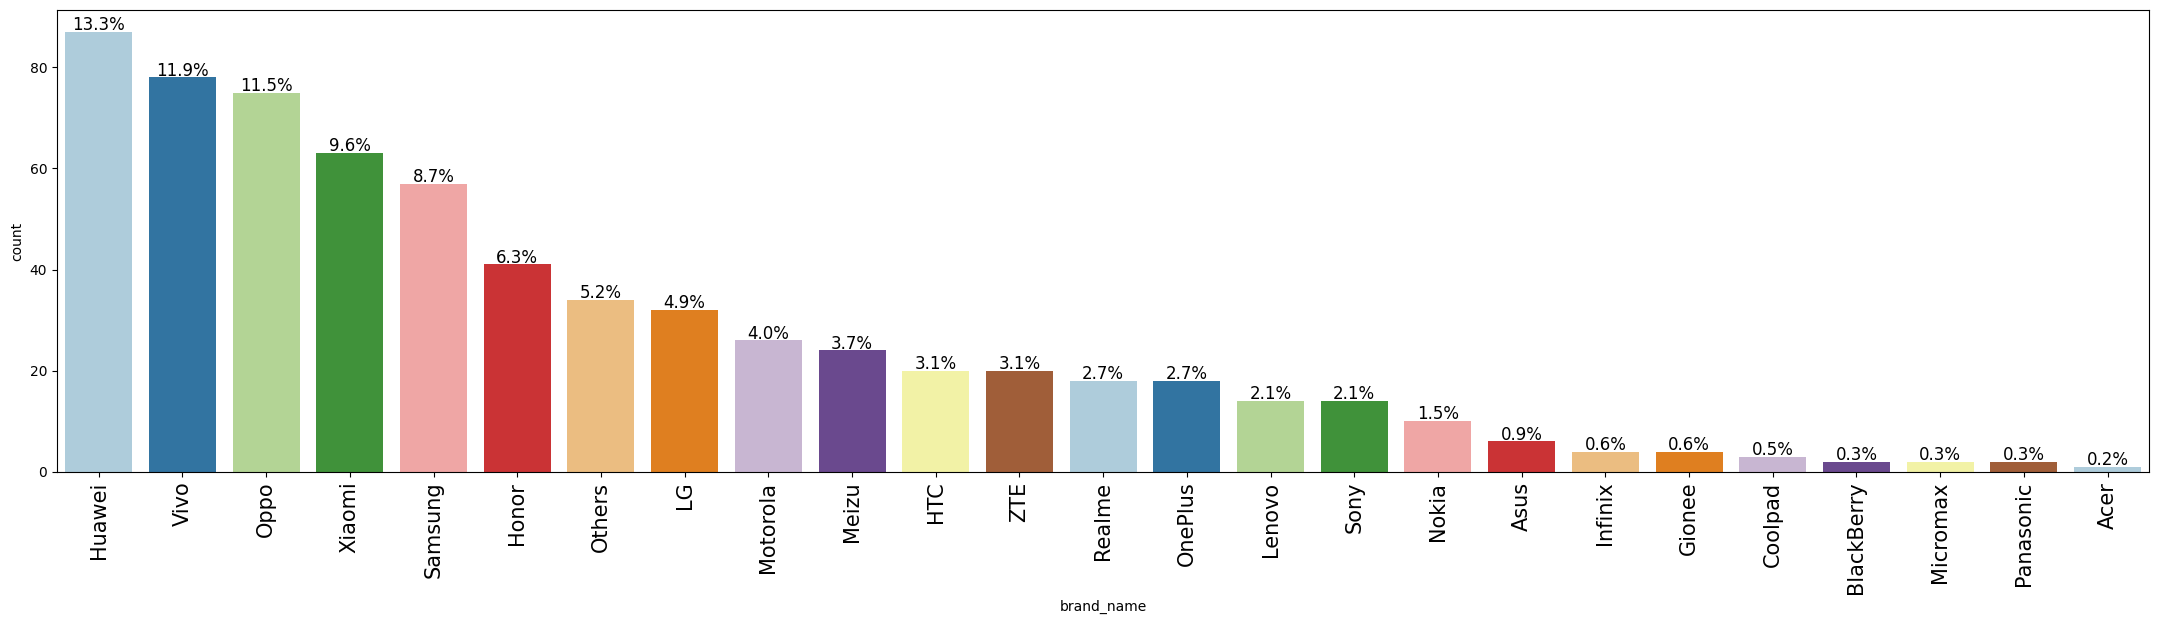

In [ ]:
labeled_barplot(data=high_res_front_cam_1, feature='brand_name', perc=True)

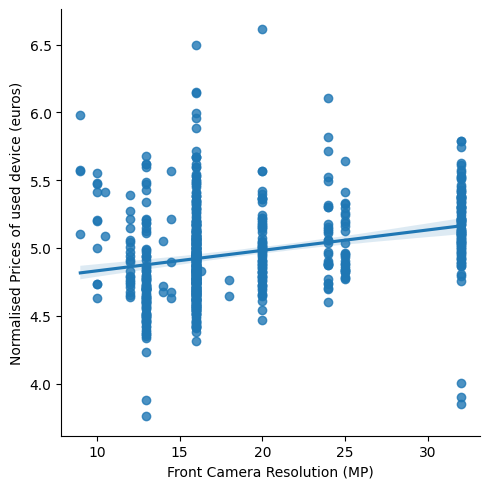

In [ ]:
# lmplot for selfie_camera_mp vs normalized_used_price for resolution > 8MP.
sns.lmplot(data=high_res_front_cam_1, x='selfie_camera_mp', y='normalized_used_price')
plt.xlabel('Front Camera Resolution (MP)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.show()

Analzing rear camera resolution : 

In [ ]:
high_res_main_cam_1 = df1.query('main_camera_mp>16')
print(f'Number of devices with high rear camera resolution, ie, greater than 16MP is: {high_res_main_cam_1.shape[0]}')

Number of devices with high rear camera resolution, ie, greater than 16MP is: 94


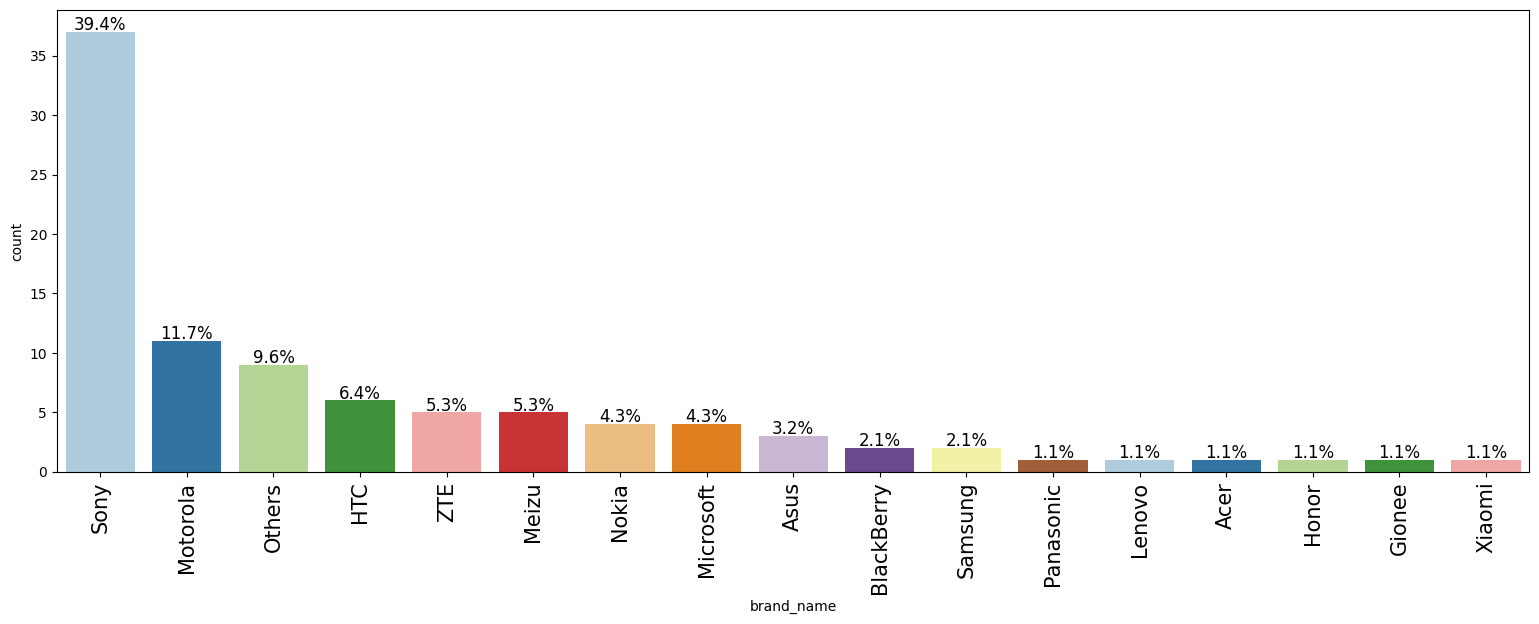

In [ ]:
labeled_barplot(data=high_res_main_cam_1, feature='brand_name', perc=True)

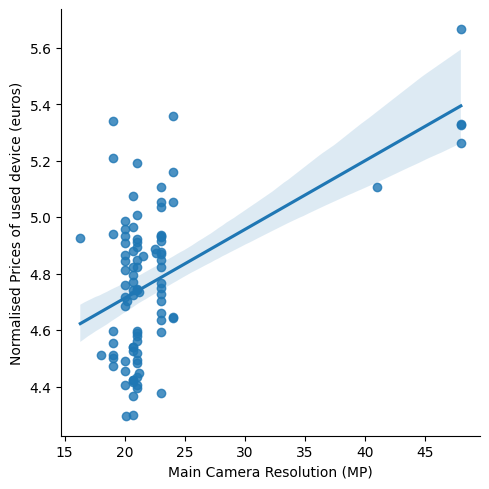

In [ ]:
# lmplot for main_camera_mp vs normalized_used_price for resolution > 16MP.
sns.lmplot(data=high_res_main_cam_1, x='main_camera_mp', y='normalized_used_price')
plt.xlabel('Main Camera Resolution (MP)')
plt.ylabel('Normalised Prices of used device (euros)')
plt.show()

Observations: 

*   The plots suggest that the count and percentages of devices concerning different brands (for both large front and rear camera resolutions) did not get affected by imputations.




**Q7 : Which attributes are highly correlated with the normalized price of a used device?**

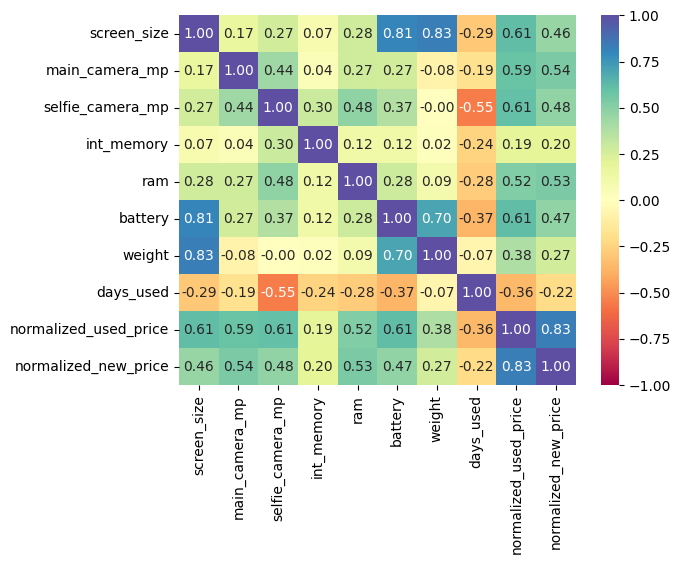

In [ ]:
sns.heatmap(df1[column_list].corr(), vmin=-1, vmax=1, annot=True, fmt='0.2f', cmap='Spectral')
plt.show()

Observations: 

*   There are minor differences in the correlation values after performing imputations. 
*   Following are the correlation values before and after imputation: 

|Variables | Corr. Value before imputation   | Corr. Value after imputation |
|----------| -------------------- | ------------------------------------ |
| main_camera_mp & screen_size  | 0.15 | 0.17  |
| selfie_camera_mp & main_camera_mp | 0.43 | 0.44  |
| int_memory & main_camera_mp | 0.02 | 0.04 |
| ram & screen_size  | 0.27 | 0.28  |
| ram & main_camera_mp | 0.26 | 0.27  |
| battery & main_camera_mp | 0.25 | 0.27 |
| weight & main_camera_mp  | -0.09 | -0.08  |
| weight & int_memory | 0.01 | 0.02  |
| days_used & main_camera_mp | -0.14 | -0.19 |

*   There are no changes in the correlation values for the column normalized_used_price with other variables.
*   There are no changes in the correlation values for the column normalized_new_price with other variables.

## Feature Engineering

In [ ]:
# Considering 2021 as the year the data was collected:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

##Outlier Check


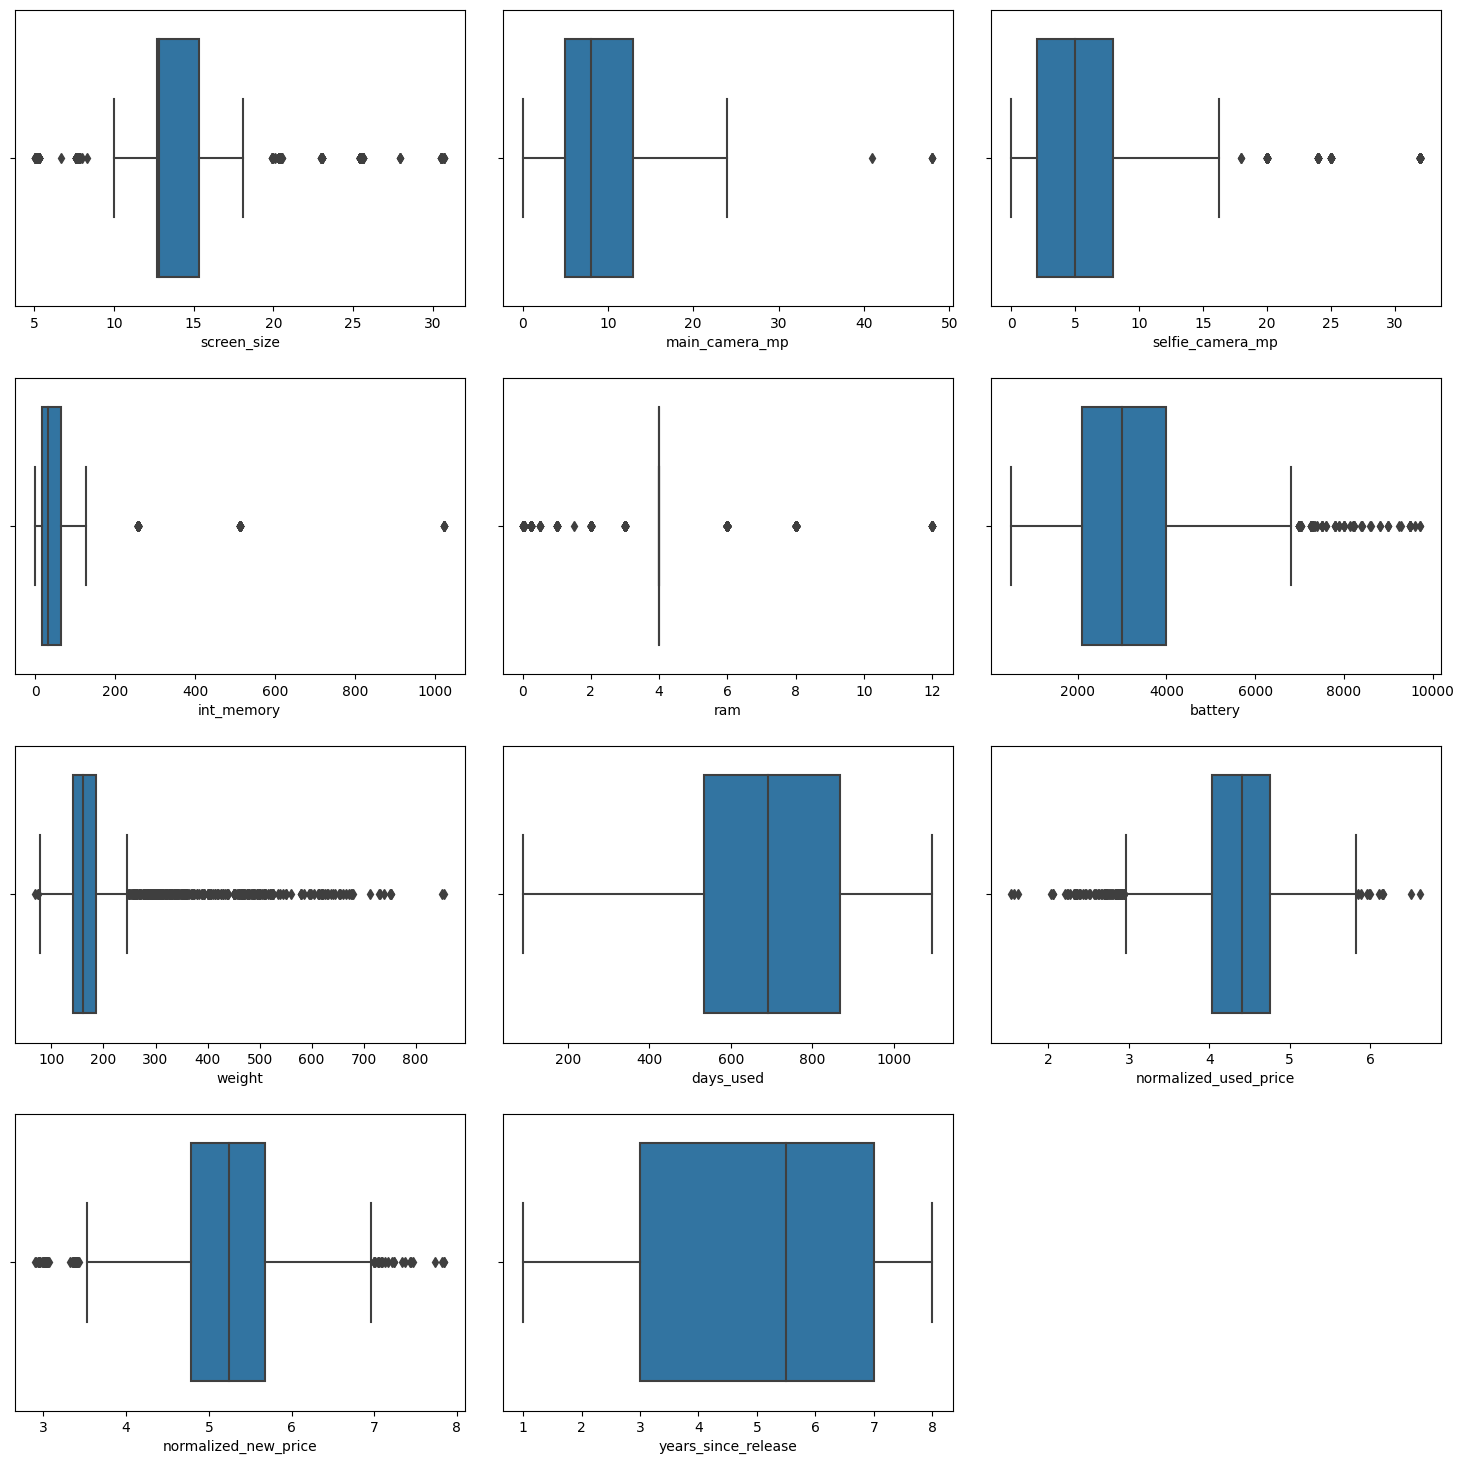

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

Observations: 

*   There are quite a few outliers in the data.
*   However, we will not treat them as they are proper values.



## Data Preparation for modeling

In [ ]:
# selecting columns whose datatypes are object to convert to dummy columns:
category_columns = df1.select_dtypes(include=object).columns.to_list()
category_columns

['brand_name', 'os', '4g', '5g']

In [ ]:
# Creating dummy columns: 
df1 = pd.get_dummies(df1, columns=category_columns, drop_first=True)
df1.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  days_used  normalized_used_price  normalized_new_price  ...  \
0   146.0        127               4.307572              4.715100  ...   
1   213.0        325               5.162097              5.519018  ...   
2   213.0        162               5.111084              5.884631  ...   
3   480.0        345               5.135387              5.630961  ...   
4   185.0        293               4.389995              4.947837  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0                 0                0                0                  0   
1                 0                0                0                  0   
2                 0                0                0                  0   
3                 0                0                0                  0   
4                 0                0                0                  0   

   brand_name_ZTE  os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0               0          0           0       0       1       0  
1               0          0           0       0       1       1  
2               0          0           0       0       1       1  
3               0          0           0       0       1       1  
4               0          0           0       0       1       0  

[5 rows x 49 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3454 non-null   float64
 1   main_camera_mp         3454 non-null   float64
 2   selfie_camera_mp       3454 non-null   float64
 3   int_memory             3454 non-null   float64
 4   ram                    3454 non-null   float64
 5   battery                3454 non-null   float64
 6   weight                 3454 non-null   float64
 7   days_used              3454 non-null   int64  
 8   normalized_used_price  3454 non-null   float64
 9   normalized_new_price   3454 non-null   float64
 10  years_since_release    3454 non-null   int64  
 11  brand_name_Alcatel     3454 non-null   uint8  
 12  brand_name_Apple       3454 non-null   uint8  
 13  brand_name_Asus        3454 non-null   uint8  
 14  brand_name_BlackBerry  3454 non-null   uint8  
 15  bran

Observations: 

*   After creating dummy columns from the category datatype, the total number of columns in the dataset is 49 columns.

In [ ]:
# Splitting data into independent(X) and dependent(y) variables:
X = df1.drop('normalized_used_price', axis = 1)
y = df1['normalized_used_price']

In [ ]:
# to build linear regression_model using statsmodels
import statsmodels.api as sm

In [ ]:
# Adding constant to independent variable X: 
X = sm.add_constant(X)

In [ ]:
# Importing function train_test_split to split the data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data set into test and traininf data sets:
# in the ratio training data = 70% and test data = 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 1)

In [ ]:
# Train data shape: 
print(f'Indep training df: {X_train.shape}')
print(f'Dep training df: {y_train.shape}')

Indep training df: (2417, 49)
Dep training df: (2417,)


In [ ]:
# Test Data shape: 
print(f'Indep test df: {X_test.shape}')
print(f'Dep test df: {y_test.shape}')

Indep test df: (1037, 49)
Dep test df: (1037,)


Observations: 

*   No. of rows in the training data = 2417
*   No. of rows in the test data =  1037
*   No. of columns in the independent training data (ie, X_train dataset) =  49 (48 independent variables + 1constant column)
*   No. of columns in the dependent training data (ie, y_train) =  1
*   No. of columns in the independent test data (ie, X_test dataset) =  49 (48 independent variables + 1constant column)
*   No. of columns in the dependent test data (ie, y_test) =  1


## Model Building - Linear Regression

In [ ]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                           04:39:42   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


##Model Performance Check

In [ ]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [ ]:
# function to compute mape
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

In [ ]:
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)  
    adjr2 = adj_r2_score(predictors, target, pred) 
    mse = mean_squared_error(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)  

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({'MSE':mse, "RMSE":rmse, "MAE":mae, "R-squared":r2, "Adj. R-squared":adjr2, "MAPE":mape},index=[0])
    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_train_perf = model_performance_regression(model, X_train, y_train)
model_train_perf

Training Performance



MSE      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.052847  0.229884  0.180326   0.844886        0.841675  4.326841

In [ ]:
# checking model performance on test set (seen 30% data)
print("Testing Performance\n")
model_test_perf = model_performance_regression(model, X_test, y_test)
model_test_perf

Testing Performance



MSE      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.056814  0.238358  0.184749   0.842479        0.834659  4.501651

Interpretation and Observations of the Regression results: 

*   Adjusted. R-squared : The value for adjusted r-sq. is a high value of 0.842, which is good.
*   Const coefficient : The value for y-intercept is 1.3156.
*   The value for r_squared is around 0.845, so the model is not underfitting. 
*   The train and test RMSE and MAE are comparable, so the model is not overfitting either.
*   MAE suggests that the model can predict normalized prices of used devices within a mean error of around 0.185 on the test data.
*   MAPE of 4.502 on the test data means that we are able to predict within 4.502% of the normalized price of used devices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Test for Multicolinearity




In [ ]:
# to compute VIF: 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
vif = checking_vif(X_train)
vif

feature         VIF
0                   const  227.744081
1             screen_size    7.677290
2          main_camera_mp    2.285051
3        selfie_camera_mp    2.812473
4              int_memory    1.364152
5                     ram    2.282352
6                 battery    4.081780
7                  weight    6.396749
8               days_used    2.660269
9    normalized_new_price    3.119430
10    years_since_release    4.899007
11     brand_name_Alcatel    3.405693
12       brand_name_Apple   13.057668
13        brand_name_Asus    3.332038
14  brand_name_BlackBerry    1.632378
15      brand_name_Celkon    1.774721
16     brand_name_Coolpad    1.468006
17      brand_name_Gionee    1.951272
18      brand_name_Google    1.321778
19         brand_name_HTC    3.410361
20       brand_name_Honor    3.340687
21      brand_name_Huawei    5.983852
22     brand_name_Infinix    1.283955
23     brand_name_Karbonn    1.573702
24          brand_name_LG    4.849832
25        brand_name_Lava    1.711360
26      brand_name_Lenovo    4.558941
27       brand_name_Meizu    2.179607
28    brand_name_Micromax    3.363521
29   brand_name_Microsoft    1.869751
30    brand_name_Motorola    3.274558
31       brand_name_Nokia    3.479849
32     brand_name_OnePlus    1.437034
33        brand_name_Oppo    3.971194
34      brand_name_Others    9.711034
35   brand_name_Panasonic    2.105703
36      brand_name_Realme    1.946812
37     brand_name_Samsung    7.539866
38        brand_name_Sony    2.943161
39       brand_name_Spice    1.688863
40        brand_name_Vivo    3.651437
41        brand_name_XOLO    2.138070
42      brand_name_Xiaomi    3.719689
43         brand_name_ZTE    3.797581
44              os_Others    1.859863
45             os_Windows    1.596034
46                 os_iOS   11.784684
47                 4g_yes    2.467681
48                 5g_yes    1.813900

In [ ]:
# Checking which columns have vif>5 :
high_vif_cols = vif.loc[(vif['VIF']>=5) & (vif['feature']!='const')]
column_list = []
for feature in high_vif_cols['feature']:
  column_list.append(feature)

column_list

['screen_size',
 'weight',
 'brand_name_Apple',
 'brand_name_Huawei',
 'brand_name_Others',
 'brand_name_Samsung',
 'os_iOS']

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]
        #print(train.columns)

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
res = treating_multicollinearity(X_train, y_train, column_list)
res

col  Adj. R-squared after_dropping col  \
0    brand_name_Apple                           0.841809   
1   brand_name_Huawei                           0.841808   
2   brand_name_Others                           0.841806   
3              os_iOS                           0.841795   
4  brand_name_Samsung                           0.841774   
5         screen_size                           0.838381   
6              weight                           0.838071   

   RMSE after dropping col  
0                 0.232201  
1                 0.232201  
2                 0.232203  
3                 0.232211  
4                 0.232227  
5                 0.234703  
6                 0.234928

In [ ]:
#difference in adjusted r-squares from the base model and model when 'screen_size' column is dropped:
0.842 - 0.838381

0.003618999999999928

In [ ]:
#difference in adjusted r-squares from the base model and model when 'weight' column is dropped:
0.842 - 0.838071

0.00392899999999996

In [ ]:
col_to_drop = "screen_size"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


feature         VIF
0                   const  202.673906
1          main_camera_mp    2.281835
2        selfie_camera_mp    2.809009
3              int_memory    1.362043
4                     ram    2.282350
5                 battery    3.842989
6                  weight    2.993855
7               days_used    2.648929
8    normalized_new_price    3.077650
9     years_since_release    4.730315
10     brand_name_Alcatel    3.405533
11       brand_name_Apple   13.000338
12        brand_name_Asus    3.326698
13  brand_name_BlackBerry    1.631042
14      brand_name_Celkon    1.774528
15     brand_name_Coolpad    1.467719
16      brand_name_Gionee    1.941437
17      brand_name_Google    1.319334
18         brand_name_HTC    3.399980
19       brand_name_Honor    3.340354
20      brand_name_Huawei    5.981046
21     brand_name_Infinix    1.283526
22     brand_name_Karbonn    1.573494
23          brand_name_LG    4.832548
24        brand_name_Lava    1.711092
25      brand_name_Lenovo    4.553789
26       brand_name_Meizu    2.176424
27    brand_name_Micromax    3.358629
28   brand_name_Microsoft    1.868243
29    brand_name_Motorola    3.262356
30       brand_name_Nokia    3.464643
31     brand_name_OnePlus    1.437004
32        brand_name_Oppo    3.965445
33      brand_name_Others    9.652572
34   brand_name_Panasonic    2.104853
35      brand_name_Realme    1.943845
36     brand_name_Samsung    7.523421
37        brand_name_Sony    2.937375
38       brand_name_Spice    1.683302
39        brand_name_Vivo    3.650625
40        brand_name_XOLO    2.137844
41      brand_name_Xiaomi    3.713988
42         brand_name_ZTE    3.788971
43              os_Others    1.625212
44             os_Windows    1.595936
45                 os_iOS   11.678957
46                 4g_yes    2.466915
47                 5g_yes    1.810289

In [ ]:
high_vif_cols = vif.loc[(vif['VIF']>=5) & (vif['feature']!='const')]
column_list = []
for feature in high_vif_cols['feature']:
  column_list.append(feature)

column_list

['brand_name_Apple',
 'brand_name_Huawei',
 'brand_name_Others',
 'brand_name_Samsung',
 'os_iOS']

Observations : 
*   We ignore the VIF values for dummy variables and the constant (intercept).
*   VIF is highest for the column 'screen_size'.
*   On dropping 'screen_size', adj. R-squared decreases by 0.0036, which is very less. Hence, we drop the feature 'screen_size'.
*   After dropping the screen_size, we check for the VIF values for the remaining columns again. 
*   Since, no other column apart from constant and dummy variables have VIF value greater than 5, we can conclude that there is no multicollinearity among the remaining columns.  





In [ ]:
# Rebuilding the model:
# model2 does not use 'screen_size' as one of its features.

model2 = sm.OLS(y_train, X_train2).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                           04:39:43   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observations: 

*   The adj. R-squared value has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect on the model.

### Dropping high p-value variables

The steps for dropping the high p_value variables are: 
*   Build a model, check the p-values of the variables, and drop the column with the highest p-value.
*   Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
*   Repeat the above two steps till there are no columns with p-value > 0.05.

In [ ]:
# Below code automates the above mention three steps for dropping high p_value variables:  

# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1
while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
# X_train3 contains the data from all the columns whose p_value<0.05.
# We will use this to make our final model on which we will check the assumptions for linearity, indepence, normality and homoscedasticity.

X_train3 = X_train2[selected_features]

In [ ]:
# Rebuilding model (leaving out columns that have p_value >0.05)
model3 = sm.OLS(y_train, X_train3).fit()
print(model3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                           04:39:44   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_train_perf = model_performance_regression(model3, X_train3, y_train)
model_train_perf

Training Performance



MSE     RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.05477  0.23403  0.182751    0.83924        0.838235  4.395407

In [ ]:
X_test3 = X_test2[selected_features]

In [ ]:
# checking model performance on final test set (seen 30% data)
print("Final Test Performance\n")
model_test_perf = model_performance_regression(model3, X_test3, y_test)
model_test_perf

Final Test Performance



MSE      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.05829  0.241434  0.186649   0.838387        0.836013  4.556349

Observations: 

* Now no feature has a p-value greater than 0.05, so we'll consider the features in *X_train3* as the final set of predictor variables and *model3* as the final model to move forward with.
* Now adjusted R-squared is 0.838, i.e., our model can explain almost 84% of the variance.
* The adjusted R-squared in *model2* (where we considered the variables without multicollinearity) was 0.838. This shows that the variables we dropped were not affecting the model.
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.



### Test for Linearity and Independence

In [ ]:
# Creating the dataframe with actual, fitted and residual values: 
df_pred = pd.DataFrame()
df_pred['Actual_Values'] = y_train
df_pred['Fitted_values'] = model3.fittedvalues
df_pred['Residuals'] = model3.resid.values

In [ ]:
df_pred.head()

Actual_Values  Fitted_values  Residuals
3026       4.087488       3.867319   0.220169
1525       4.448399       4.602001  -0.153602
1128       4.315353       4.286957   0.028395
3003       4.282068       4.195169   0.086899
2907       4.456438       4.490563  -0.034125

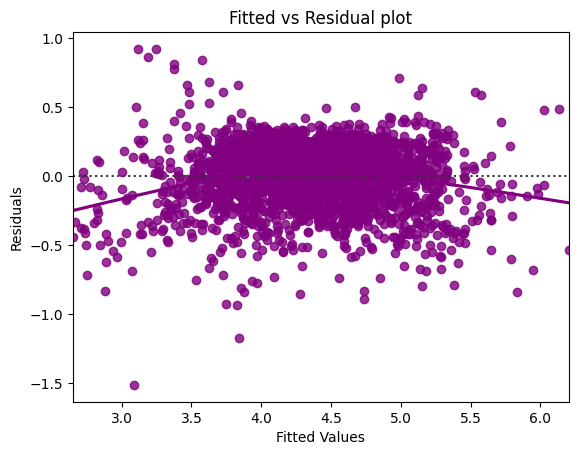

In [ ]:
# Scatter plot for distribution between residuals vs fitted values:
sns.residplot(
    data=df_pred, x="Fitted_values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observations: 

*   Since there is no pattern in the above plot we can say that assumption of linearity and independence have been satisfied.

### Test for Normality

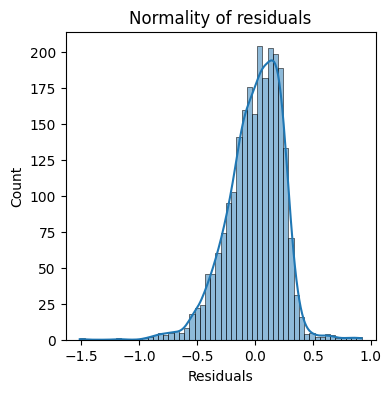

In [ ]:
# Checking the distribution of residuals:
plt.figure(figsize=(4,4))
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

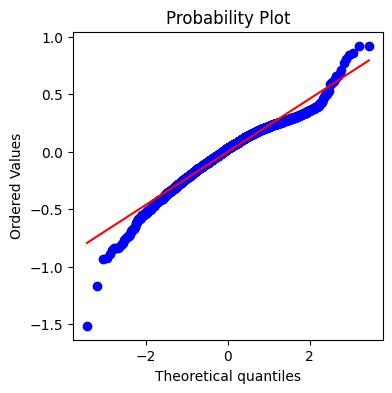

In [ ]:
# Checking the Q-Q plot of residuals:
import pylab
import scipy.stats as stats

plt.figure(figsize=(4,4))
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
# Using the Shapiro-Wilk test: 

#Null hypothesis: Residuals are normally distributed.
#Alternate hypothesis: Residuals are not normally distributed.

from scipy.stats import shapiro

test_stat, p_value = shapiro(df_pred['Residuals']) 
print(f"The test_statistic value of Shapiro-Wilk's test is : {test_stat}")
print(f"The p-value of Shapiro-Wilk's test is : {p_value}")

if p_value <= 0.05:
  print('We reject the null hypothesis at 5% significance level.')
else: 
  print('We fail to reject the null hypothesis at 5% significance level.')

The test_statistic value of Shapiro-Wilk's test is : 0.9676972031593323
The p-value of Shapiro-Wilk's test is : 6.995261942370773e-23
We reject the null hypothesis at 5% significance level.


Observations:


* Distributions of Residuals: The histogram of residuals has a bell-shaped curve.
*   Probability Plot (Q-Q plot): The residuals more or less follow a straight line except for the tails.
*   Shapiro-Wilk's Test: We can conclude that the residuals are not normally distributed. However, as an approximation, we might be willing to accept this distribution as close to being normal. 
*   So, we can conclude that the assumption of normality has been met.





### Test for Homoscedasticity

In [ ]:
# Test for homoscedasticity by using the goldfeldquandt test

# Null hypothesis : Residuals are homoscedastic.
# Alternate hypothesis : Residuals have heteroscedasticity.

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
test_stat, p_val, side = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
print(f'test_stat:{test_stat}, p_val:{p_val}, side:{side}')

if p_val <= 0.05:
  print('We reject the null hypothesis at 5% significance level.')
else: 
  print('We fail to reject the null hypothesis at 5% significance level.')

test_stat:1.0087504199106758, p_val:0.4401970650667301, side:increasing
We fail to reject the null hypothesis at 5% significance level.


Observations: 

*   Since the p_value from the Goldfeldquandt test is greater than 0.05, we can conclude that the residuals are homoscedastic.
*   Hence, the assumption of homoscedasticity has been met.



### Prediction on the test data

In [ ]:
# predictions on the test set
pred = model3.predict(X_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.566741   4.385671
2341  3.696103   4.003934
1913  3.592093   3.643812
688   4.306495   4.103463
650   4.522115   5.113026
2291  4.259294   4.398406
40    4.997685   5.459871
1884  3.875359   4.053143
2538  4.206631   4.035868
45    5.380450   5.227899

Observations:

*   The actual and predicted values provided by the model (i.e., model3) are comparable.


## Final Model

In [ ]:
# Finally printing the final model : 
print(model3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                           04:39:46   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_train_perf = model_performance_regression(model3, X_train3, y_train)
model_train_perf

Training Performance



MSE     RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.05477  0.23403  0.182751    0.83924        0.838235  4.395407

In [ ]:
# checking model performance on final test set (seen 30% data)
print("Final Test Performance\n")
model_test_perf = model_performance_regression(model3, X_test3, y_test)
model_test_perf

Final Test Performance



MSE      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.05829  0.241434  0.186649   0.838387        0.836013  4.556349

Observations: 

* The model is able to explain almost 84% of the variation in the data.
* RMSE and MAE values are low for train and test sets, indicating that the model is not suffering from either underfitting or overfitting.
* The MAPE on the test set suggests we can predict within almost 4.56% of the normalised prices of used devices. 
* Hence, we can conclude the model *model3* is good for prediction as well as inference purposes.

### Print the linear regression equation.

In [ ]:
# Checking the model parameters
model3.params

const                   1.499981
main_camera_mp          0.020967
selfie_camera_mp        0.013827
ram                     0.020713
weight                  0.001662
normalized_new_price    0.441472
years_since_release    -0.029170
brand_name_Karbonn      0.115598
brand_name_Samsung     -0.037423
brand_name_Sony        -0.066993
brand_name_Xiaomi       0.080068
os_Others              -0.127575
os_iOS                 -0.090006
4g_yes                  0.050213
5g_yes                 -0.067259
dtype: float64

In [ ]:
# Checking the model parameters
# precision = 4 decimal places (to match the model summary)
round(model3.params,4)

const                   1.5000
main_camera_mp          0.0210
selfie_camera_mp        0.0138
ram                     0.0207
weight                  0.0017
normalized_new_price    0.4415
years_since_release    -0.0292
brand_name_Karbonn      0.1156
brand_name_Samsung     -0.0374
brand_name_Sony        -0.0670
brand_name_Xiaomi       0.0801
os_Others              -0.1276
os_iOS                 -0.0900
4g_yes                  0.0502
5g_yes                 -0.0673
dtype: float64

In [ ]:
# Writing the equation of linear regression:
Equation = "normalised_used_price ="
print(Equation, end=" ")
for i in range(len(X_train3.columns)):
    if i == 0:
        print(round(model3.params[i],4), "+", end=" ")
    elif i != len(X_train3.columns) - 1:
        print(
            round(model3.params[i],4),
            "* (",
            X_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(round(model3.params[i],4), "* (", X_train3.columns[i], ")")

normalised_used_price = 1.5 + 0.021 * ( main_camera_mp ) +  0.0138 * ( selfie_camera_mp ) +  0.0207 * ( ram ) +  0.0017 * ( weight ) +  0.4415 * ( normalized_new_price ) +  -0.0292 * ( years_since_release ) +  0.1156 * ( brand_name_Karbonn ) +  -0.0374 * ( brand_name_Samsung ) +  -0.067 * ( brand_name_Sony ) +  0.0801 * ( brand_name_Xiaomi ) +  -0.1276 * ( os_Others ) +  -0.09 * ( os_iOS ) +  0.0502 * ( 4g_yes ) +  -0.0673 * ( 5g_yes )


Inferences: 

*   The value for the constant coefficient (const) is 1.5000.
*   A unit increase in the resolution of rear camera (`main_camera_mp`) increses the normalized price of a used device by 0.0210 euros, all other variables held constant.
*   A unit increase in the resolution of front camera (`selfie_camera_mp`) increses the normalized price of a used device by 0.0138 euros, all other variables held constant.
*   A unit increase in the amount of ram present in the used device (`ram`) increses the normalized price by 0.0207 euros, all other variables held constant.
*   A unit increase in weight of the used device (`weight`) increses the normalized price by 0.0017 euros, all other variables held constant.
*   A unit increase in the normalised price of the new device of the same model(`normalized_new_price`) increses the normalized price by 0.4415 euros, all other variables held constant.
*   A unit increase in years passed by since the model was released(`years_since_release`) decreases the normalized price of the used device by 0.0292 euros, all other variables held constant.
*   Used devices of the brand Karbonn (`brand_name_Karbonn`) will have a units 0.1156 euros higher normalized price than the ones of the brand Acer(brand_name_Acer).
*   Used devices of the brand Samsung (`brand_name_Samsung`) will have a 0.0374 euros lower normalized price than the ones of the brand Acer(brand_name_Acer).
*   Used devices of the brand Sony (`brand_name_Sony`) will have a 0.0670 euros lower normalized price than the ones of the brand Acer(brand_name_Acer).
*   Used devices of the brand Xiaomi (`brand_name_Xiaomi`) will have a 0.0801 euros higher normalized price than the ones of the brand Acer(`brand_name_Acer`).
*   Used devices which have 'Others' as its operating system (`os_Others`) will have a 0.1276 euros lower normalized price than the ones with the Android operating System(`os_Android`).
*   Used devices which have iOS as its operating system (`os_iOS`) will have 0.0900 euros lower normalized price than the ones with the Android operating system (`os_Android`).
*   Used devices which support the 4g network (`4g_yes`) will have 0.0502 euros higher normalized price than the ones that do not support 4g(`4g_no`).
*   Used devices which support the 5g network (`5g_yes`) will have 0.0673 euros lower normalized price than the ones that do not support 5g(`5g_no`).



## Actionable Insights and Recommendations 

### Insights: 

*   The price of a used device is positively correlated with the resolution of the main camera, the resolution of the front camera, the amount of internal storage and RAM present in the device, its battery capacity, and its weight. Hence, the normalized price of the used device increases with an increase in these parameters.
*   Also, the normalized price of a used device is negatively correlated with the number of days it has been used. Hence, the device used for a longer duration will be less expensive. 
*   The price of a new device of the same model is higher as compared to that of a refurbished device.
*   Android is the most popular operating system in the dataset.
*   The most popular brands in the dataset are Samsung, Huawei, LG, and Lenovo.
*   Majority of devices support a 4g network. 
*   Prices of the devices that support a 4g network are comparatively cheaper than those that support a 5g network.
*   The model can explain ~84% of the variation in the data and within 4.56% of the normalized used price on the test data. This indicates that the model is good for prediction as well as inference purposes.

 








### Inferences from the model: 

*   The value for the constant coefficient (const) is 1.5000.
*   A unit increase in the resolution of main camera (`main_camera_mp`) increses the normalized price of a used device by 0.0210 euros, all other variables held constant.
*   A unit increase in the resolution of front camera (`selfie_camera_mp`) increses the normalized price of a used device by 0.0138 euros, all other variables held constant.
*   A unit increase in the amount of ram present in the used device (`ram`) increses the normalized price by 0.0207 euros, all other variables held constant.
*   A unit increase in weight of the used device (`weight`) increses the normalized price by 0.0017 euros, all other variables held constant.
*   A unit increase in the normalised price of the new device of the same model(`normalized_new_price`) increses the normalized price by 0.4415 euros, all other variables held constant.
*   A unit increase in years passed by since the model was released(`years_since_release`) decreases the normalized price of the used device by 0.0292 euros, all other variables held constant.
*   Used devices of the brand Karbonn (`brand_name_Karbonn`) will have a units 0.1156 euros higher normalized price than the ones of the brand Acer(brand_name_Acer).
*   Used devices of the brand Samsung (`brand_name_Samsung`) will have a 0.0374 euros lower normalized price than the ones of the brand Acer(brand_name_Acer).
*   Used devices of the brand Sony (`brand_name_Sony`) will have a 0.0670 euros lower normalized price than the ones of the brand Acer(brand_name_Acer).
*   Used devices of the brand Xiaomi (`brand_name_Xiaomi`) will have a 0.0801 euros higher normalized price than the ones of the brand Acer(`brand_name_Acer`).
*   Used devices which have 'Others' as its operating system (`os_Others`) will have a 0.1276 euros lower normalized price than the ones with the Android operating System(`os_Android`).
*   Used devices which have iOS as its operating system (`os_iOS`) will have 0.0900 euros lower normalized price than the ones with the Android operating system (`os_Android`).
*   Used devices which support the 4g network (`4g_yes`) will have 0.0502 euros higher normalized price than the ones that do not support 4g(`4g_no`).
*   Used devices which support the 5g network (`5g_yes`) will have 0.0673 euros lower normalized price than the ones that do not support 5g(`5g_no`).


### Recommendations: 

*   As the market for used and refurbished devices is growing considerably,  Recell can analyze whether providing used devices at a comparatively cheaper rate lead to more purchases thereby increasing profit.
*   ReCell should further analyze what are the optimum values of different features within a certain price range.
*   ReCell should analyze its pricing strategy based on customers' preferences for different features. As different customers may have different priorities on features, customers may be willing to pay a little more if the feature value matches their needs.
*   Customers are more likely to buy from brands they trust and hence Recell may need to further analyze customer's preferences regarding their choice of brands and operating systems.
*   Recell should analyze if they should invest in a higher inventory of devices of more popular brands and operating systems.
*   As a more satisfied customer may refer others to purchase from the same place that he did, ReCell needs to analyze the customer's satisfaction in terms of availability of the device, its quality, ease of purchase process, timely delivery of the product, and ease of return process, if the expectations of the customer are not met.
*   Coupons and referral discounts may be provided to customers so that they actively engage with the website for their changing needs, hence leading to higher purchases. 
*   The brands and operating systems labeled as 'Others' in the dataset need to be properly identified so that the analysis is better.













___